In [2]:
# Imported Libraries
import numpy as np
import pandas as pd 
import copy
from collections import Counter
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

#Sampling Libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Visual Libraries
from matplotlib import pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')

# Performance metrics libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ParameterGrid

# Tensorflow
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.losses import mse
from keras import backend as K
from keras.optimizers import Adam

from VAE import VAE_oversampling
from GAN import GAN
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setting the random seed 
import random
seed = 42
np.random.seed(seed) 
tf.random.set_seed(42)
random.seed(seed)

Data Importing

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

## Visualizations

In [7]:
df.isnull().values.any()

False

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
#Number of fraud and non fraud data
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

fraud_perc = len(fraud)/df.shape[0]
nonFraud_perc = len(nonFraud)/df.shape[0]

print("Total number of transactions is", df.shape[0],"of which", len(fraud),"are fraudulent and", len(nonFraud), "are not.")
print('Percentage of frauds :',fraud_perc*100,'%')
print('Percentage of non frauds :',nonFraud_perc*100,'%')

Total number of transactions is 284807 of which 492 are fraudulent and 284315 are not.
Percentage of frauds : 0.1727485630620034 %
Percentage of non frauds : 99.82725143693798 %


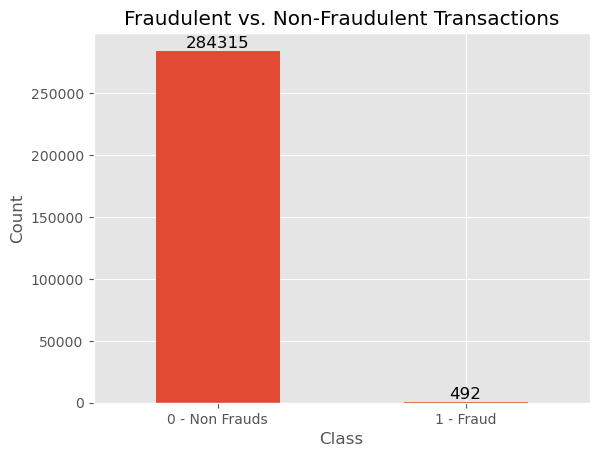

In [11]:
#Plot Transaction class against Frequency
labels = ['0 - Non Frauds','1 - Fraud']
classes = pd.value_counts(df['Class'], sort = True)
ax = classes.plot(kind = 'bar', rot=0)
plt.title("Fraudulent vs. Non-Fraudulent Transactions")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Count")

# Adding count on top of each bar
for i, count in enumerate(classes):
    ax.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

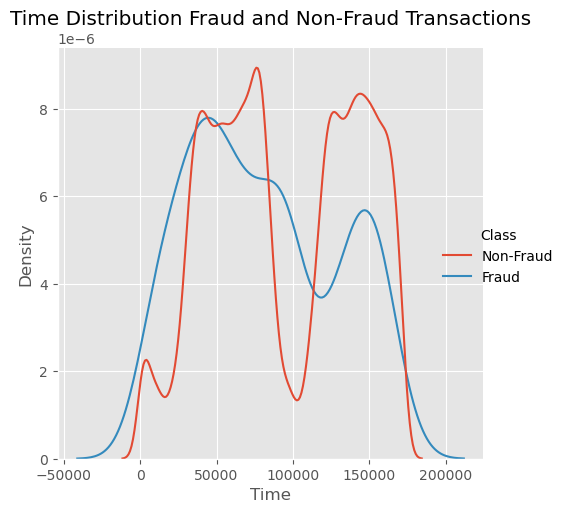

In [31]:
# Assuming df is your DataFrame containing the data

# Create a displot for Time distribution by Class
g = sns.displot(data=df, x='Time', hue='Class', kind='kde', common_norm=False)

# Set title and labels
plt.title("Time Distribution for Fraud and Non-Fraud Transactions")
plt.xlabel("Time")
plt.ylabel("Density")


# Customize legend labels
g._legend.set_title('Class')
legend_labels = {0: 'Non-Fraud', 1: 'Fraud'}
for t, l in zip(g._legend.texts, legend_labels.values()):
    t.set_text(l)

plt.show()

Text(-3.9305555555555554, 0.5, 'Density')

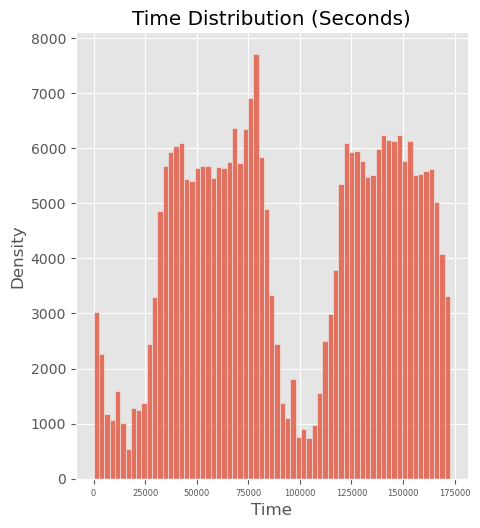

In [44]:
# distribution of Time
time = df['Time'].values
sns.displot(time)
plt.title("Time Distribution (Seconds)")
plt.xticks(fontsize=6)
plt.xlabel("Time")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

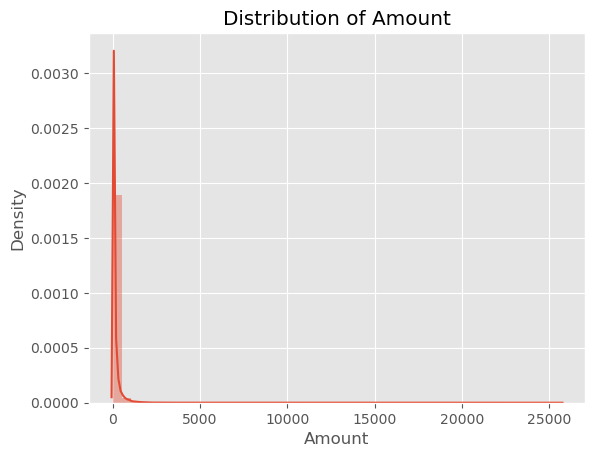

In [45]:
# distribution of Amount
amount = [df['Amount'].values]
sns.distplot(amount)
plt.title("Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Density")

In [52]:
df['Amount'].corr(df['V5'])

-0.38635625616306063

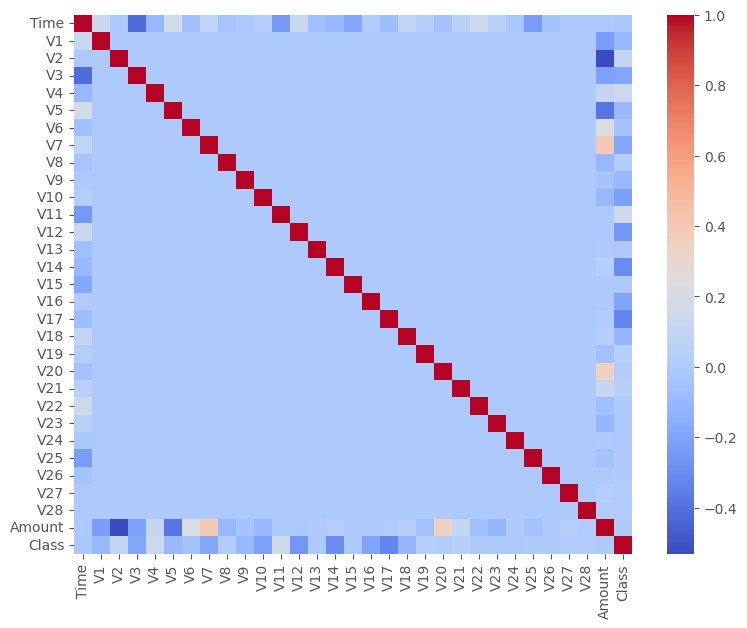

In [38]:
# heat map of correlation of features
correlation_matrix = df.corr()
# Create a mask for the upper triangle
mask = np.triu(correlation_matrix)
fig = plt.figure(figsize=(9,7))
sns.heatmap(correlation_matrix,cmap='coolwarm')
plt.show()

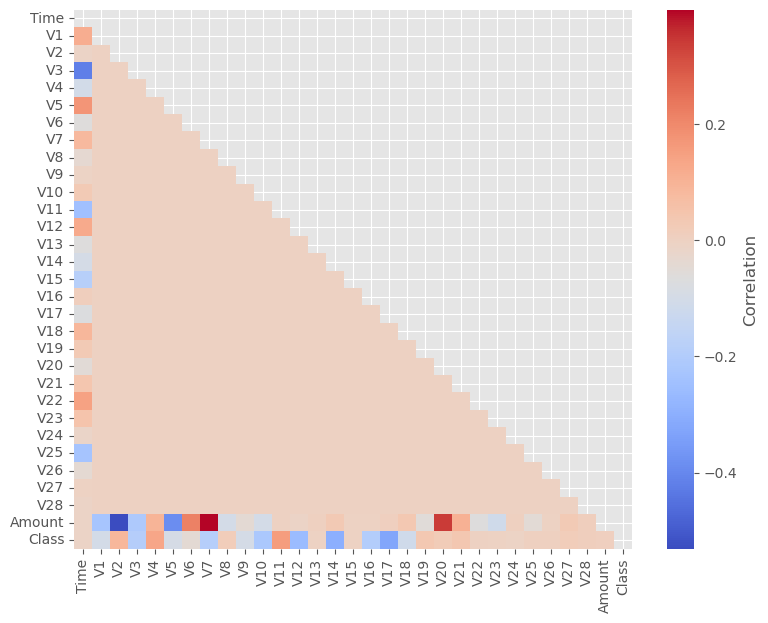

In [41]:

# Heat map of correlation of features
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(correlation_matrix)

# Set up the figure
fig, ax = plt.subplots(figsize=(9, 7))

# Create the heatmap with the mask
sns.heatmap(correlation_matrix, cmap='coolwarm', mask=mask, cbar_kws={'label': 'Correlation'})
plt.show()

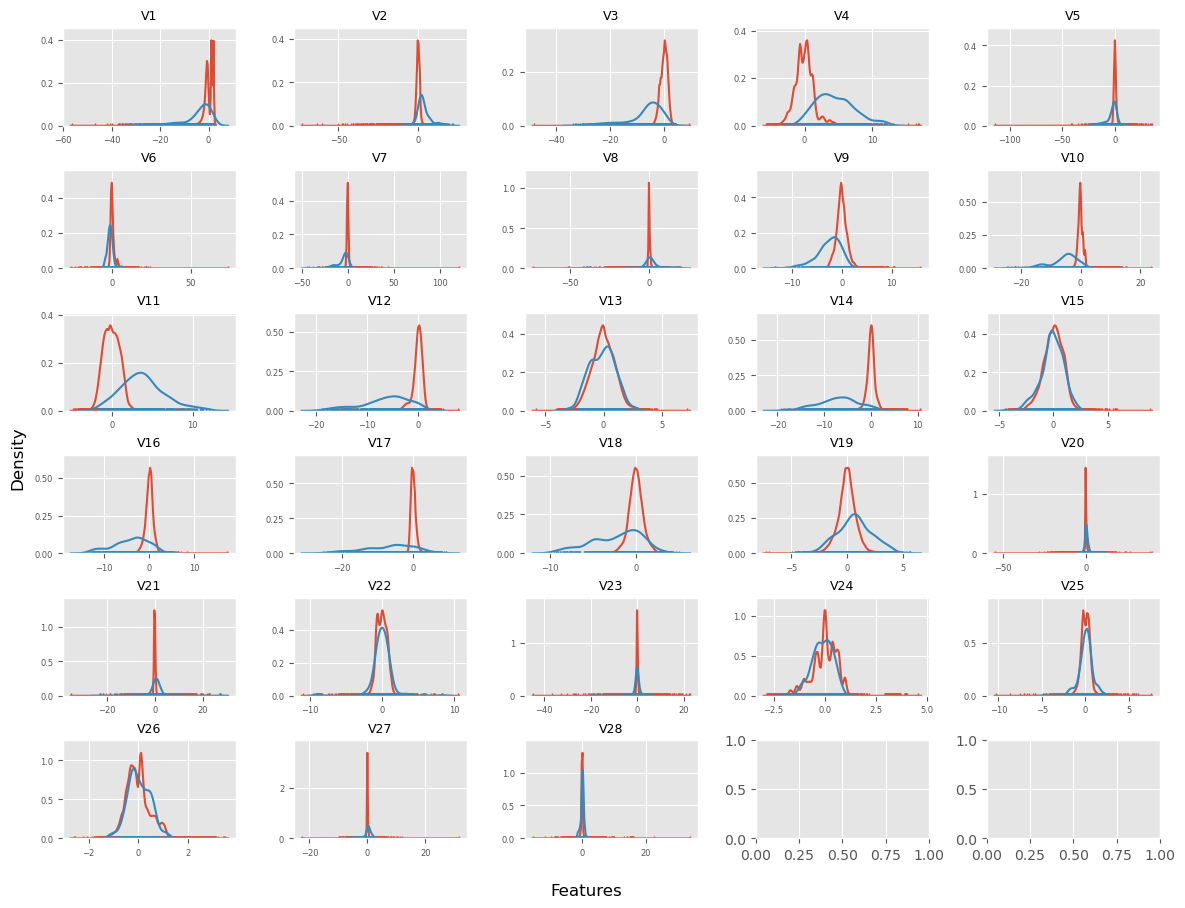

In [64]:
fig, axes = plt.subplots(6, 5, figsize=(12,9))
fig.supylabel('Density')
fig.supxlabel('Features')
fig.tight_layout()

target_0 = df.loc[df['Class'] == 0]
target_1 = df.loc[df['Class'] == 1]

for i, column in enumerate(df.columns[1:29], 1):
    plt.subplot(6,5,i)
    sns.distplot(target_0[[column]], hist=False, rug=True)
    sns.distplot(target_1[[column]], hist=False, rug=True)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(column, fontsize=9)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

plt.show()

## Train, Validate, Test split

In [5]:
X = df.drop(['Class'], axis=1)
y = df['Class']

#Split data initially to train and remainingfor cross
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the validation dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
print(f"The validation and test datasets have {sorted(Counter(y_test).items())[0][1]} records for the majority class and {sorted(Counter(y_test).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 227845
The number of records in the validation dataset is 56962
The training dataset has 227451 records for the majority class and 394 records for the minority class.
The validation and test datasets have 56864 records for the majority class and 98 records for the minority class.


In [6]:
X_train.head()

Time        V1        V2        V3        V4        V5        V6  \
265518  161919.0  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933   
180305  124477.0  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697   
42664    41191.0 -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261   
198723  132624.0  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339   
82325    59359.0 -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490   

              V7        V8        V9  ...       V20       V21       V22  \
265518 -1.479661  1.139880  1.406819  ... -0.134435  0.076197  0.297537   
180305 -0.002192  0.674782  0.045826  ... -0.227279  0.038628  0.228197   
42664  -2.212603 -5.037523  0.000772  ...  1.280856 -2.798352  0.109526   
198723 -1.427984  0.010010 -1.118447  ... -0.490642 -0.139670  0.077013   
82325   0.504347 -0.113817 -0.044782  ... -0.275297 -0.243245 -0.173298   

             V23       V24       V25       V26       V27       V28  Amount  
265518  0.307915  0.690980 -0.350316 -0.388907  0.077641 -0.032248    7.32  
180305  0.035542  0.707090  0.512885 -0.471198  0.002520 -0.069002    2.99  
42664  -0.436530 -0.932803  0.826684  0.913773  0.038049  0.185340  175.10  
198723  0.208310 -0.538236 -0.278032 -0.162068  0.018045 -0.063005    6.10  
82325  -0.006692 -1.362383 -0.292234 -0.144622 -0.032580 -0.064194   86.10  

[5 rows x 30 columns]

In [7]:
X_test.head()

Time        V1        V2        V3        V4        V5        V6  \
263020  160760.0 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439   
11378    19847.0 -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536   
147283   88326.0 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246   
219439  141734.0  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935   
36939    38741.0  1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384   

              V7        V8        V9  ...       V20       V21       V22  \
263020  1.885879 -0.614233  0.311652  ...  0.394322  0.080084  0.810034   
11378  -1.795519 -0.250020  3.073504  ... -0.515765 -0.295555  0.109305   
147283  1.444125 -0.718922  1.874046  ...  2.034786 -1.060151  0.016867   
219439  0.207792 -0.338140  0.455091  ... -0.192024 -0.281684 -0.639426   
36939   0.854039 -0.475963 -0.629658  ...  0.009083 -0.164015 -0.328294   

             V23       V24       V25       V26       V27       V28  Amount  
263020 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319   23.00  
11378  -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938   11.85  
147283 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764   76.07  
219439  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077    0.99  
36939  -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527    1.50  

[5 rows x 30 columns]

## Cross validation with hyperparameter tuning

### Model functions

In [12]:
def visualize_confusion_matrix(cf_matrix, axis):
    sns.heatmap(pd.DataFrame(cf_matrix), ax=axis, annot=True, cmap="YlGnBu" ,fmt='g')
    axis.set_title('Confusion matrix', y=1.1)
    axis.set_ylabel('Actual label')
    axis.set_xlabel('Predicted label')

In [13]:
def model_scores(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 score:", f1_score(y_true, y_pred))
    print("ROC_AUC:", roc_auc_score(y_true, y_pred))

In [14]:
def cross_val_scores(scores):
    print(f"Accuracy:, {scores['test_accuracy'].mean():0.6f} (+/- {scores['test_accuracy'].std():0.6f})")
    print(f"Precision: {scores['test_precision'].mean():0.6f} (+/- {scores['test_precision'].std():0.6f})")
    print(f"Recall: {scores['test_recall'].mean():0.6f} (+/- {scores['test_recall'].std():0.6f})")
    print(f"F1 score: {scores['test_f1'].mean():0.6f} (+/- {scores['test_f1'].std():0.6f})")
    print(f"ROC_AUC: {scores['test_roc_auc'].mean():0.6f} (+/- {scores['test_roc_auc'].std():0.6f})")

In [15]:
def plot_roc_curve(model, y_true, X, axis):
    y_pred_proba = model.predict_proba(X)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_true,  y_pred_proba)
    auc = metrics.roc_auc_score(y_true, y_pred_proba)

    #create ROC curve
    axis.plot(fpr,tpr)
    axis.set_ylabel('Sensitivity/TPR/Recall')
    axis.set_xlabel('Specificity/FPR')
    axis.set_title("ROC-AUC="+str(auc))
    #plt.legend(loc=4)

In [16]:
def evaluate_model(X_test, y_test, estimator):
    num_fraud_cases_in_test = len(y_test[y_test==1])
    num_normal_cases_in_test = len(y_test[y_test==0])
    
    predictions = estimator.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    
    # Plot normalized confusion matrix and precision recall curve
    fig, axes = plt.subplots(1,2, figsize=(10,4))
    
    visualize_confusion_matrix(cm, axes[0])
    
    plot_roc_curve(estimator, y_test, X_test, axes[1])
    plt.tight_layout()
    
    # Print summary    
    print(f"\nClassified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
    print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")

    model_scores(y_test, predictions)

In [15]:
def model_cv(X_train, y_train, model, score, param_grid, sampling_technique = None):
    skf = StratifiedKFold(n_splits=5)

    if sampling_technique == 'smote':
        print("SMOTE applied")
        pipeline = Pipeline(steps = 
                            [['pre_process', StandardScaler()],
                             ['smote', SMOTE(random_state=1)],
                             ['classifier', model]])
    elif sampling_technique =='undersampling':
        pipeline = Pipeline(steps=
                            [['pre_process', StandardScaler()],
                             ['undersampling', RandomUnderSampler()],
                             ['classifier', model]])
    elif sampling_technique == 'original':
        print("Original applied")
        pipeline = Pipeline(steps = 
                            [['classifier', model]])
    else:
        pipeline = Pipeline(steps = 
                            [['pre_process', StandardScaler()],
                             ['classifier', model]])
                
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grid,
                               scoring = ['accuracy','precision','recall','f1','roc_auc'],
                               refit=score,
                               cv=skf,
                               n_jobs=-1)
    

    grid_search.fit(X_train, y_train)

    cv_results = pd.DataFrame(grid_search.cv_results_)
    best_model_results = cv_results.loc[grid_search.best_index_]

    print(f"Accuracy:, {best_model_results['mean_test_accuracy']:0.6f} (+/- {best_model_results['std_test_accuracy']:0.6f})")
    print(f"Precision: {best_model_results['mean_test_precision']:0.6f} (+/- {best_model_results['std_test_precision']:0.6f})")
    print(f"Recall: {best_model_results['mean_test_recall']:0.6f} (+/- {best_model_results['std_test_recall']:0.6f})")
    print(f"F1 score: {best_model_results['mean_test_f1']:0.6f} (+/- {best_model_results['std_test_f1']:0.6f})")
    print(f"ROC_AUC: {best_model_results['mean_test_roc_auc']:0.6f} (+/- {best_model_results['std_test_roc_auc']:0.6f})")

    print('Best hyperparameters: ', grid_search.best_params_)

    return grid_search

### Logistic Rgeression

In [18]:
param_grid_lr = dict(classifier__C = [0.01, 1, 10], 
                     classifier__penalty = ['l1', 'l2'],
                     classifier__solver = ['liblinear', 'saga'])

##### 1.0 Original Dataset Results

Original applied
Accuracy:, 0.999206 (+/- 0.000058)
Precision: 0.877297 (+/- 0.028572)
Recall: 0.629309 (+/- 0.031088)
F1 score: 0.732253 (+/- 0.023281)
ROC_AUC: 0.978430 (+/- 0.008633)
Best hyperparameters:  {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

Classified 	63 out of 98 	fraud cases correctly
Misclassified 	13 out of 56864 normal cases
Accuracy: 0.9991573329588147
Precision: 0.8289473684210527
Recall: 0.6428571428571429
F1 score: 0.7241379310344829
ROC_AUC: 0.8213142636063991


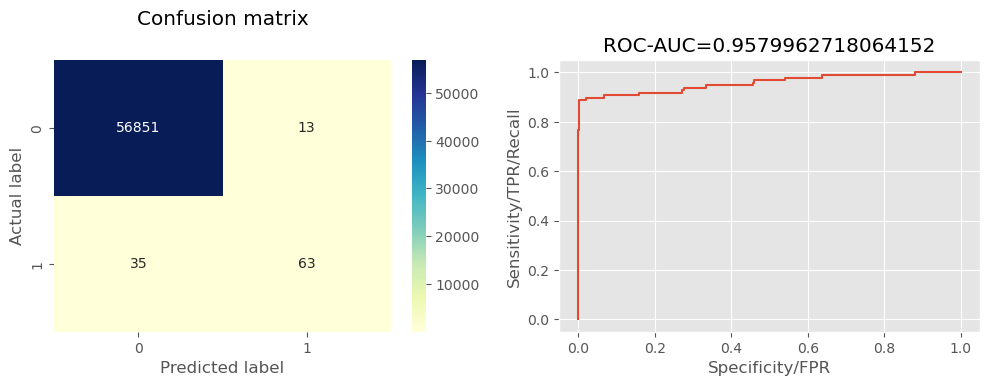

In [60]:
gs = model_cv(X_train, y_train, LogisticRegression(), 'f1', param_grid_lr, 'original')

evaluate_model(X_test, y_test, gs)

##### 1.1 Without SMOTE - Scaled

Accuracy:, 0.999214 (+/- 0.000061)
Precision: 0.880523 (+/- 0.026836)
Recall: 0.631840 (+/- 0.031786)
F1 score: 0.735173 (+/- 0.024687)
ROC_AUC: 0.978464 (+/- 0.008612)
Best hyperparameters:  {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}

Classified 	63 out of 98 	fraud cases correctly
Misclassified 	13 out of 56864 normal cases
Accuracy: 0.9991573329588147
Precision: 0.8289473684210527
Recall: 0.6428571428571429
F1 score: 0.7241379310344829
ROC_AUC: 0.8213142636063991


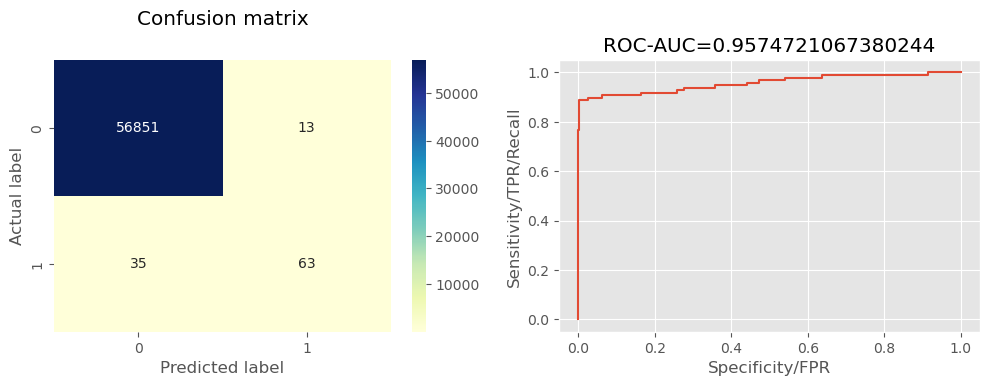

In [61]:
gs = model_cv(X_train, y_train, LogisticRegression(), 'f1', param_grid_lr)

evaluate_model(X_test, y_test, gs)

##### 1.2 With SMOTE

SMOTE applied
Accuracy:, 0.974329 (+/- 0.001975)
Precision: 0.058821 (+/- 0.003652)
Recall: 0.918663 (+/- 0.028941)
F1 score: 0.110533 (+/- 0.006459)
ROC_AUC: 0.979831 (+/- 0.010251)
Best hyperparameters:  {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}

Classified 	90 out of 98 	fraud cases correctly
Misclassified 	1458 out of 56864 normal cases
Accuracy: 0.9742635441171307
Precision: 0.05813953488372093
Recall: 0.9183673469387755
F1 score: 0.10935601458080195
ROC_AUC: 0.9463636115673055


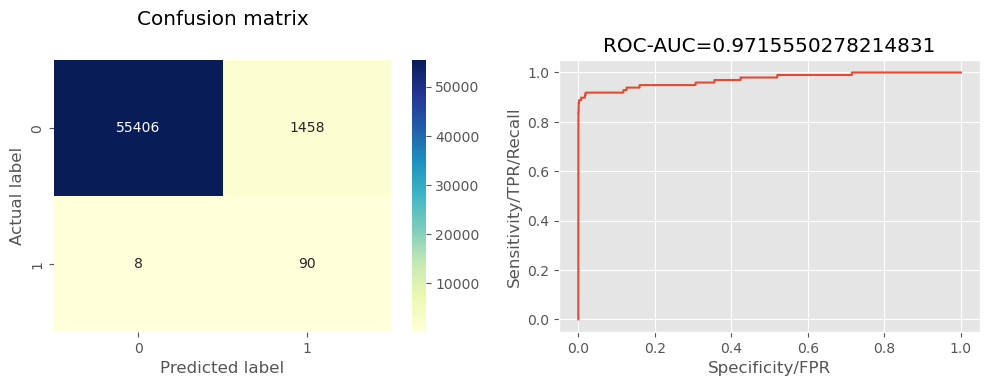

In [62]:
gs = model_cv(X_train, y_train, LogisticRegression(), "f1", param_grid_lr, 'smote')

evaluate_model(X_test, y_test, gs)

#### 1.4 Random Undersampling

Accuracy:, 0.990033 (+/- 0.001298)
Precision: 0.132001 (+/- 0.013659)
Recall: 0.839987 (+/- 0.038656)
F1 score: 0.227671 (+/- 0.019216)
ROC_AUC: 0.956293 (+/- 0.011761)
Best hyperparameters:  {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}

Classified 	86 out of 98 	fraud cases correctly
Misclassified 	622 out of 56864 normal cases
Accuracy: 0.9888697728310102
Precision: 0.12146892655367232
Recall: 0.8775510204081632
F1 score: 0.21339950372208435
ROC_AUC: 0.9333063205586117


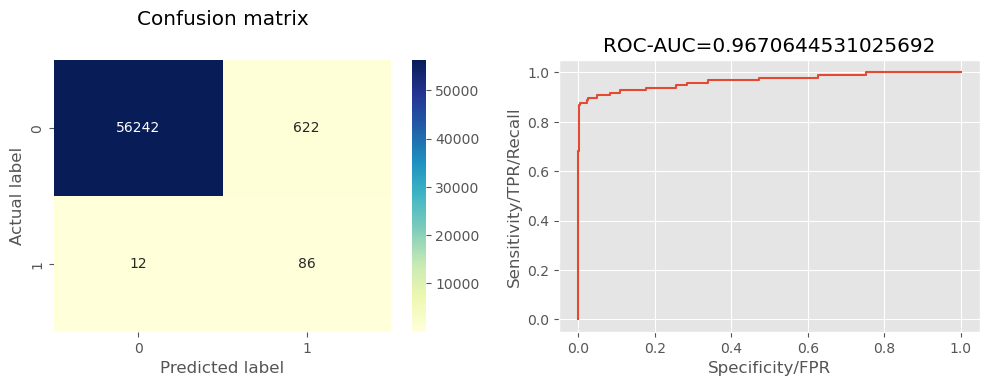

In [19]:
gs = model_cv(X_train, y_train, LogisticRegression(), "f1", param_grid_lr, 'undersampling')

evaluate_model(X_test, y_test, gs)

### Random Forest

In [16]:
# Parameters and values to tune
param_grid_rf = dict(classifier__n_estimators = [50, 100], classifier__max_depth = [None, 5])
 

##### 1.0 Original Dataset Results

Original applied
Accuracy:, 0.999500 (+/- 0.000054)
Precision: 0.933187 (+/- 0.022938)
Recall: 0.766310 (+/- 0.037857)
F1 score: 0.840689 (+/- 0.021678)
ROC_AUC: 0.940490 (+/- 0.015082)
Best hyperparameters:  {'classifier__max_depth': None, 'classifier__n_estimators': 50}

Classified 	80 out of 98 	fraud cases correctly
Misclassified 	6 out of 56864 normal cases
Accuracy: 0.9995786664794073
Precision: 0.9302325581395349
Recall: 0.8163265306122449
F1 score: 0.8695652173913043
ROC_AUC: 0.9081105078497353


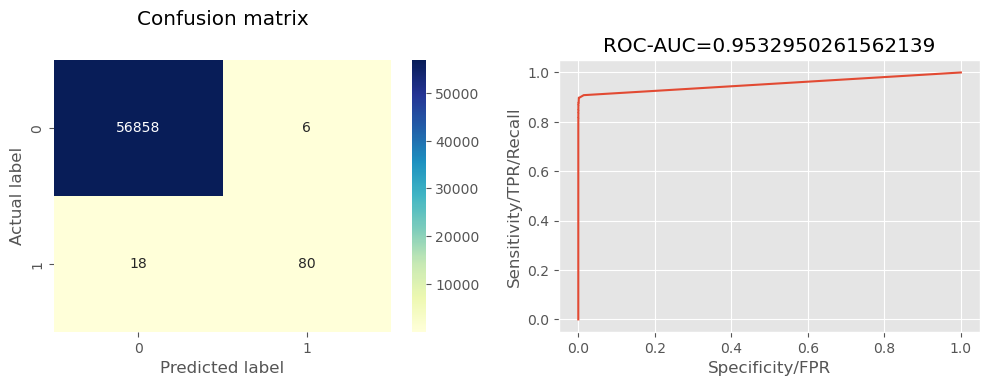

In [64]:
gs = model_cv(X_train, y_train, RandomForestClassifier(), 'f1', param_grid_rf, 'original')

evaluate_model(X_test, y_test, gs)

##### 1.1 Without SMOTE

Accuracy:, 0.999513 (+/- 0.000043)
Precision: 0.945047 (+/- 0.028852)
Recall: 0.763843 (+/- 0.029514)
F1 score: 0.844080 (+/- 0.015627)
ROC_AUC: 0.947435 (+/- 0.011105)
Best hyperparameters:  {'classifier__max_depth': None, 'classifier__n_estimators': 100}

Classified 	79 out of 98 	fraud cases correctly
Misclassified 	4 out of 56864 normal cases
Accuracy: 0.9995962220427653
Precision: 0.9518072289156626
Recall: 0.8061224489795918
F1 score: 0.8729281767955801
ROC_AUC: 0.9030260528522045


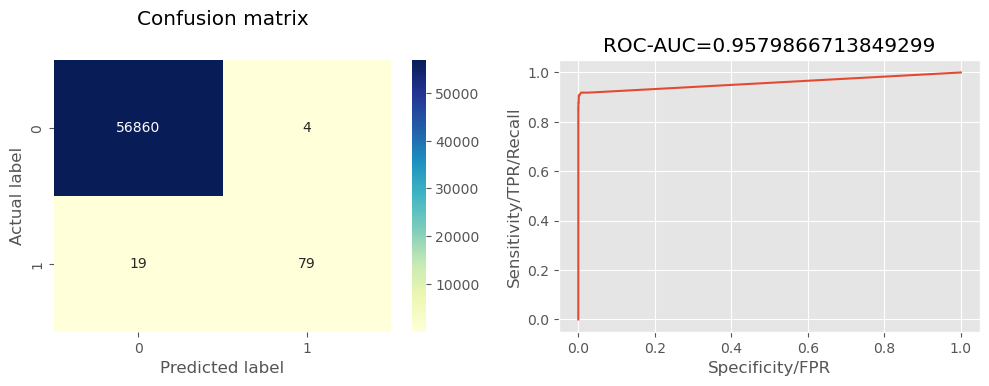

In [65]:
gs = model_cv(X_train, y_train, RandomForestClassifier(), 'f1', param_grid_rf)

evaluate_model(X_test, y_test, gs)

##### 1.2 With SMOTE

In [81]:
gs = model_cv(X_train, y_train, RandomForestClassifier(), 'f1', param_grid_rf, 'smote')

evaluate_model(X_test, y_test, gs)

SMOTE applied


#### 1.4 Random Undersampling

Accuracy:, 0.982936 (+/- 0.004136)
Precision: 0.087001 (+/- 0.018640)
Recall: 0.880623 (+/- 0.033018)
F1 score: 0.157620 (+/- 0.030289)
ROC_AUC: 0.978329 (+/- 0.006971)
Best hyperparameters:  {'classifier__max_depth': 5, 'classifier__n_estimators': 50}

Classified 	88 out of 98 	fraud cases correctly
Misclassified 	1065 out of 56864 normal cases
Accuracy: 0.9811277693901197
Precision: 0.07632263660017347
Recall: 0.8979591836734694
F1 score: 0.14068745003996805
ROC_AUC: 0.9396151433280122


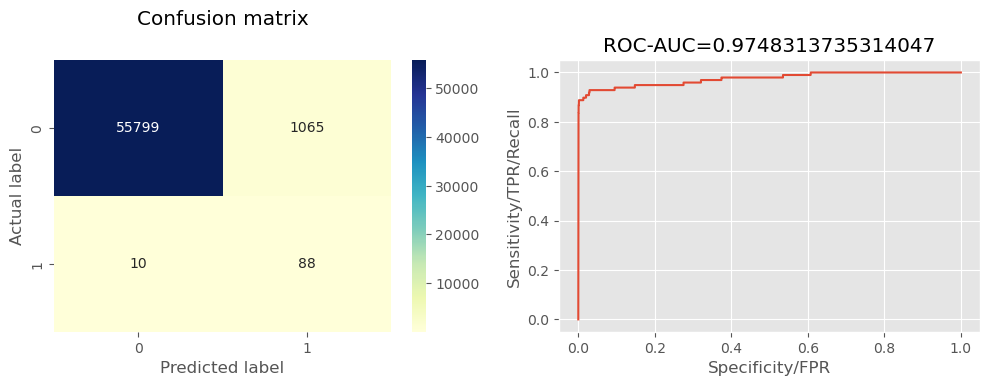

In [17]:
gs = model_cv(X_train, y_train, RandomForestClassifier(), "f1", param_grid_rf, 'undersampling')

evaluate_model(X_test, y_test, gs)

## Autoencoder

############################### Parameters tested: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 6ms/step - loss: 34.3037 - val_loss: 28.3303
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 29.6595 - val_loss: 25.9898
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.5668 - val_loss: 26.2786
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.3222 - val_loss: 25.4520
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 28.0240 - val_loss: 25.3987
Epoch 6/100
284/284 [=======================

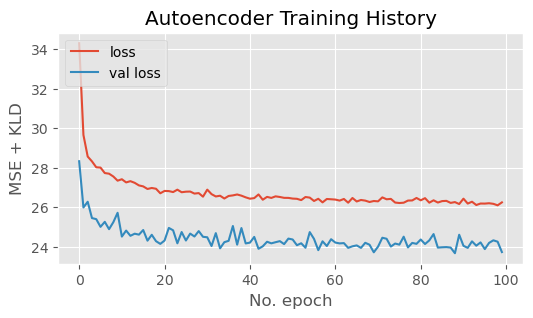

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.2702 - val_loss: 29.0171
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.5556 - val_loss: 25.8012
Epoch 3/100
283/283 [==============================] - 1s 5ms/step - loss: 28.7373 - val_loss: 25.3464
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2460 - val_loss: 24.9633
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3019 - val_loss: 25.0949
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9697 - val_loss: 24.9241
Epoch 7/100
283/283

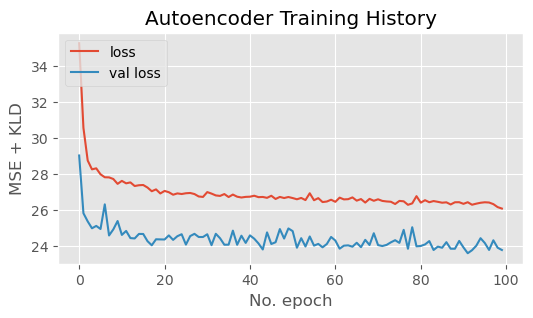

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.4010 - val_loss: 27.2977
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.8799 - val_loss: 25.0249
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4367 - val_loss: 24.5742
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2614 - val_loss: 24.4632
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3323 - val_loss: 24.5896
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0580 - val_loss: 24.1715
Epoch 7/100
283/283

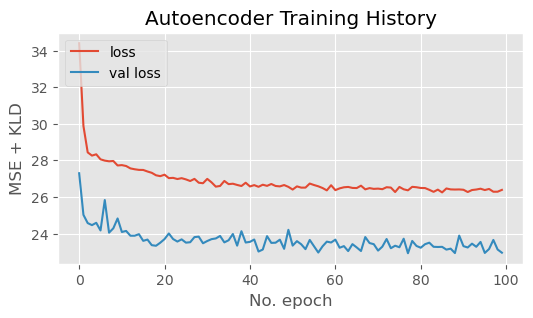

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 5ms/step - loss: 35.1304 - val_loss: 29.9839
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.9282 - val_loss: 26.5732
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.4824 - val_loss: 25.9608
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.4431 - val_loss: 25.9654
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.7701 - val_loss: 25.8064
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.8080 - val_loss: 25.5380
Epoch 7/100
283/283

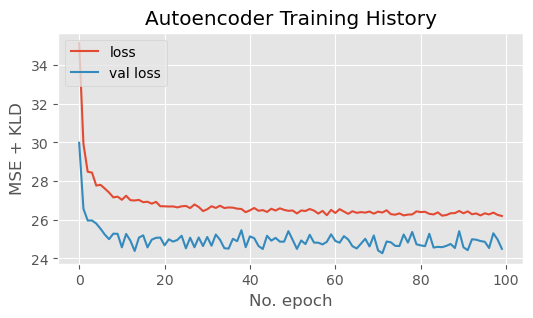

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.8786 - val_loss: 39.9832
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.9199 - val_loss: 37.0819
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.5623 - val_loss: 36.0579
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 27.0022 - val_loss: 35.8474
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.6980 - val_loss: 35.7176
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.7781 - val_loss: 35.8402
Epoch 7/100
283/283

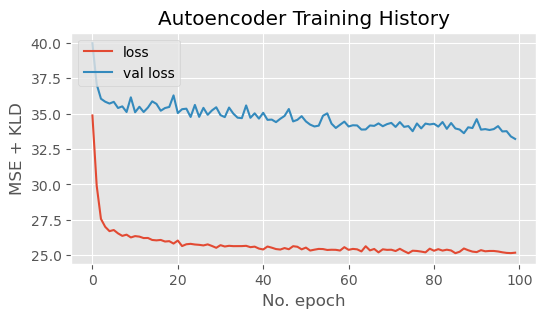

5677/5677 [==============================] - 12s 2ms/step
############################### Parameters tested: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 5ms/step - loss: 34.5923 - val_loss: 29.5214
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 29.8610 - val_loss: 25.6623
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 28.4910 - val_loss: 26.3104
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.1998 - val_loss: 25.3908
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 27.8115 - val_loss:

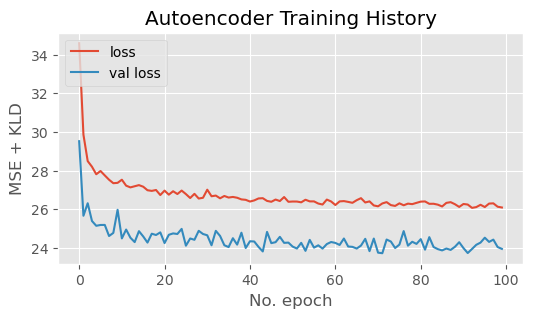

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.5871 - val_loss: 28.0321
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.0471 - val_loss: 26.3741
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7470 - val_loss: 25.2666
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2992 - val_loss: 24.9697
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4534 - val_loss: 24.9497
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0829 - val_loss: 24.5509
Epoch 7/100
283/283

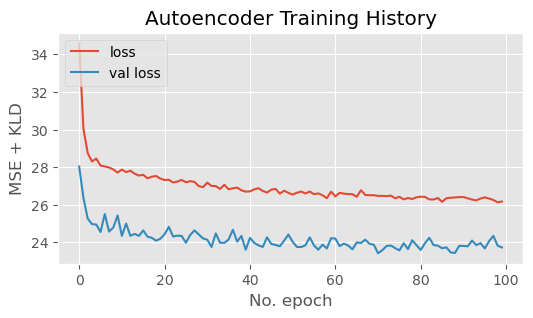

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 5ms/step - loss: 35.1207 - val_loss: 29.1921
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.5622 - val_loss: 25.6670
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6013 - val_loss: 24.5236
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.5100 - val_loss: 24.5995
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0656 - val_loss: 24.2769
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8740 - val_loss: 24.2071
Epoch 7/100
283/283

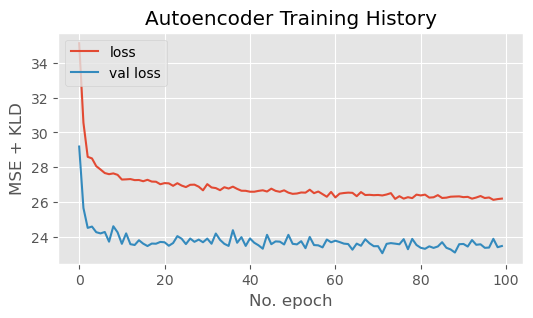

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.1811 - val_loss: 30.5049
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.9395 - val_loss: 27.8797
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.9420 - val_loss: 26.1848
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2968 - val_loss: 26.1629
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8246 - val_loss: 25.7959
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8932 - val_loss: 25.8203
Epoch 7/100
283/283

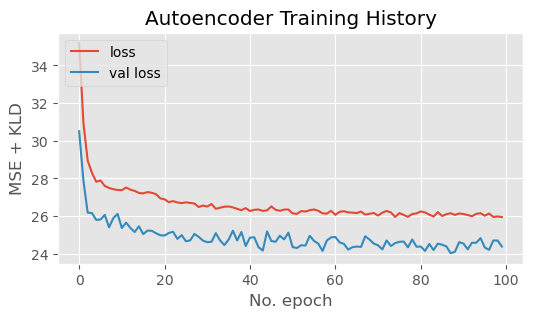

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 5ms/step - loss: 35.0058 - val_loss: 40.6051
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.0498 - val_loss: 37.0854
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0934 - val_loss: 36.1809
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 27.2505 - val_loss: 36.3962
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.1156 - val_loss: 35.6374
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 26.7471 - val_loss: 36.3601
Epoch 7/100
283/283

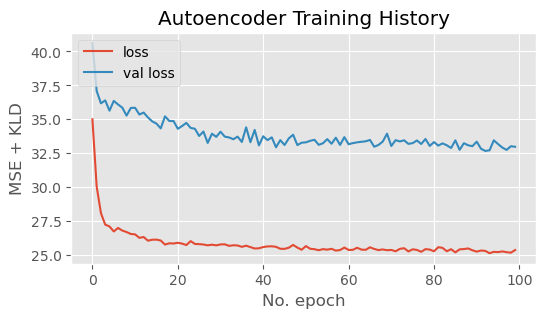

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 6ms/step - loss: 34.8783 - val_loss: 29.0844
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 29.7583 - val_loss: 26.3748
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.5860 - val_loss: 25.7073
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.1112 - val_loss: 25.2357
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 27.9410 - val_

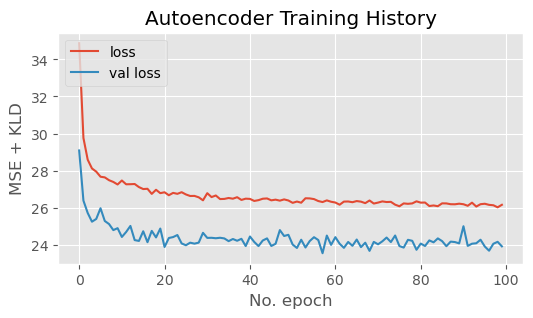

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.3464 - val_loss: 28.4646
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.9445 - val_loss: 25.7123
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4230 - val_loss: 25.5596
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0908 - val_loss: 24.9361
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1205 - val_loss: 25.0358
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8275 - val_loss: 25.1028
Epoch 7/100
283/283

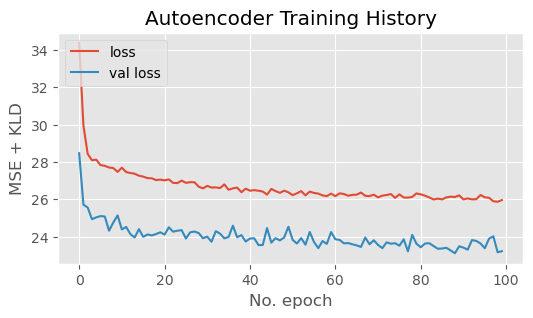

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.3472 - val_loss: 29.1184
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.4491 - val_loss: 25.4592
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.8065 - val_loss: 24.7409
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.9043 - val_loss: 24.6474
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1280 - val_loss: 24.3525
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1310 - val_loss: 24.0654
Epoch 7/100
283/283

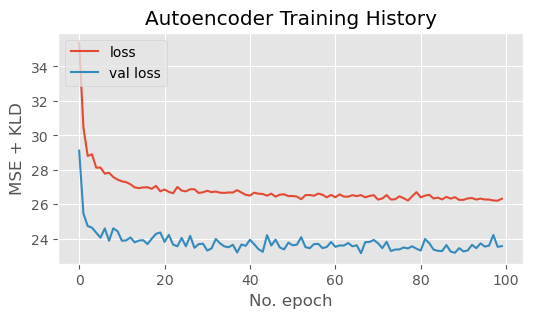

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.1000 - val_loss: 29.6391
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.8336 - val_loss: 26.4951
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2726 - val_loss: 26.0949
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0843 - val_loss: 26.1120
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.7440 - val_loss: 25.7782
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.7765 - val_loss: 25.5248
Epoch 7/100
283/283

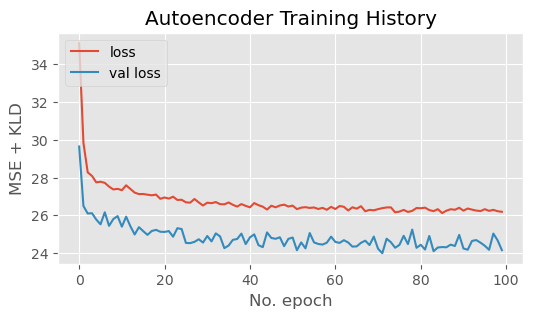

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 4s 7ms/step - loss: 33.9325 - val_loss: 38.6744
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 28.6890 - val_loss: 36.1677
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 27.2083 - val_loss: 36.0140
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 26.8406 - val_loss: 36.3640
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 26.5864 - val_loss: 35.8492
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 26.5594 - val_loss: 35.6732
Epoch 7/100
283/283

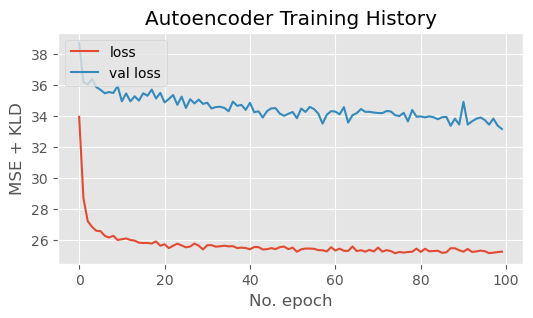

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 5ms/step - loss: 35.3335 - val_loss: 30.0564
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 30.3014 - val_loss: 26.1283
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 28.7566 - val_loss: 26.4101
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.3989 - val_loss: 25.8737
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 27.9906 - val_loss:

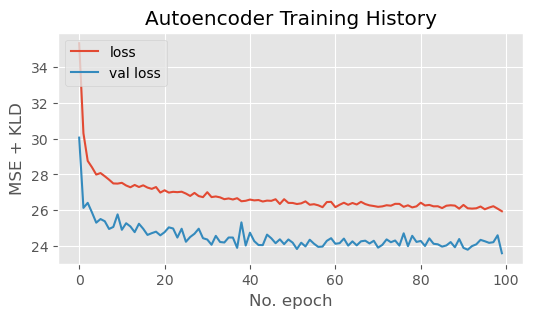

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 34.7131 - val_loss: 28.9619
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.0708 - val_loss: 25.3736
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.5825 - val_loss: 24.8458
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2705 - val_loss: 24.9043
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0128 - val_loss: 24.3158
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8956 - val_loss: 24.9004
Epoch 7/100
283/283

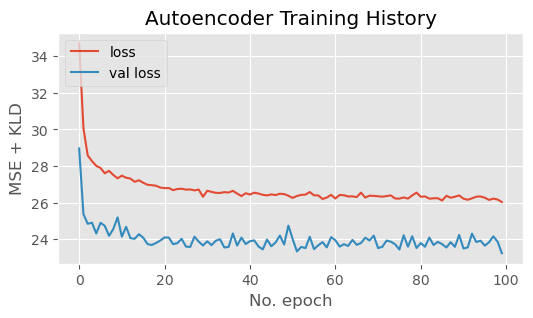

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 4s 6ms/step - loss: 34.9453 - val_loss: 28.2109
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.0713 - val_loss: 25.3314
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.4291 - val_loss: 24.7569
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1856 - val_loss: 24.3442
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1947 - val_loss: 24.0290
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.7728 - val_loss: 24.1315
Epoch 7/100
283/283

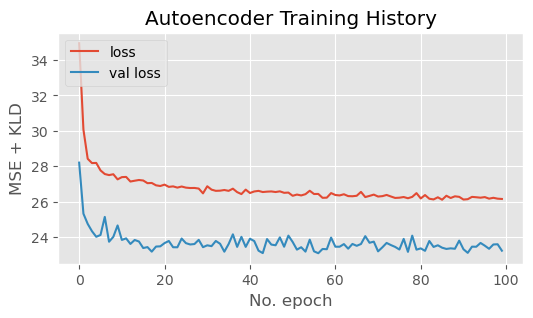

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.3007 - val_loss: 29.5316
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.8743 - val_loss: 26.4169
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4835 - val_loss: 25.9667
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3759 - val_loss: 26.1694
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8496 - val_loss: 25.6321
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9355 - val_loss: 25.8489
Epoch 7/100
283/283

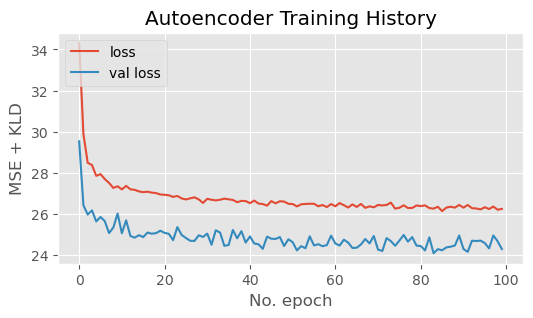

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 33.6413 - val_loss: 38.5976
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 28.8633 - val_loss: 35.8503
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 27.5343 - val_loss: 35.9811
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 26.9732 - val_loss: 36.0916
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 26.8610 - val_loss: 35.5489
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 26.6334 - val_loss: 36.0537
Epoch 7/100
283/283

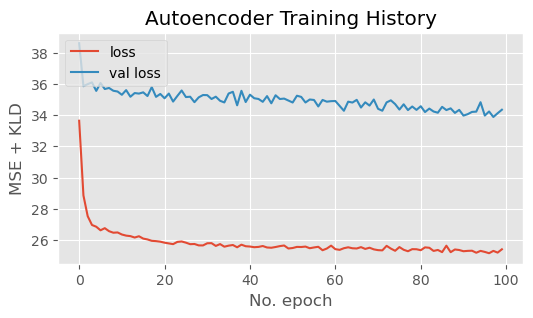

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 4ms/step - loss: 34.9467 - val_loss: 29.2067
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 29.8672 - val_loss: 26.1718
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 28.4492 - val_loss: 25.6511
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.2005 - val_loss: 25.3584
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 28.1355 - val_l

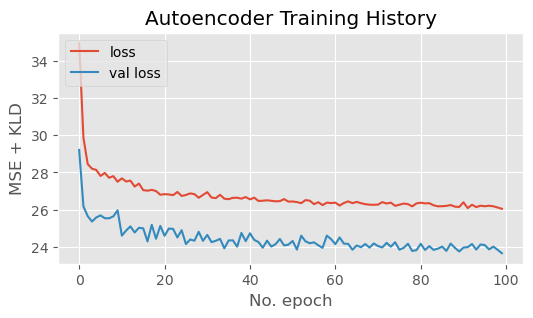

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 5ms/step - loss: 34.9245 - val_loss: 29.2508
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.3379 - val_loss: 25.6651
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.7419 - val_loss: 24.9795
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4961 - val_loss: 25.2774
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1122 - val_loss: 24.4764
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9652 - val_loss: 24.9564
Epoch 7/100
283/283

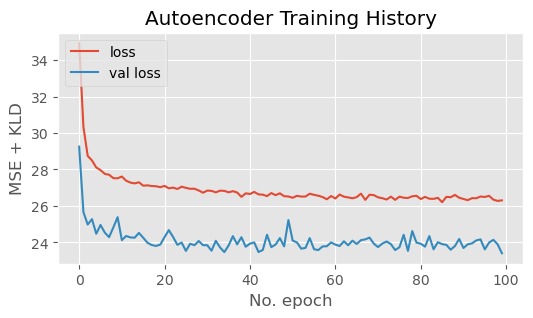

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.4966 - val_loss: 27.2153
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.9930 - val_loss: 25.1884
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6871 - val_loss: 24.8474
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1843 - val_loss: 24.3231
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2026 - val_loss: 24.4383
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8759 - val_loss: 24.0283
Epoch 7/100
283/283

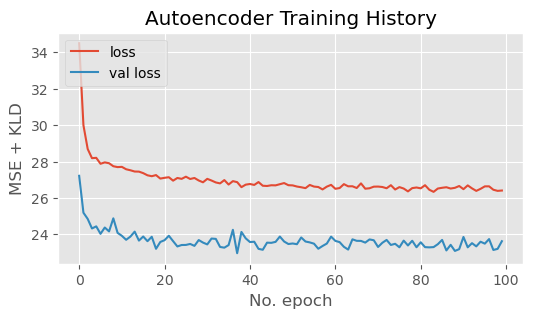

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 35.1431 - val_loss: 29.6459
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.7943 - val_loss: 26.6062
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.2469 - val_loss: 26.0637
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0723 - val_loss: 25.9263
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.7756 - val_loss: 25.7776
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.7792 - val_loss: 25.4951
Epoch 7/100
283/283

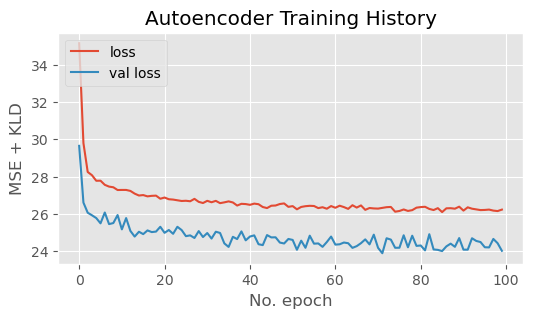

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 34.5304 - val_loss: 39.0198
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.6712 - val_loss: 36.4543
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 27.5890 - val_loss: 36.1376
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 27.0950 - val_loss: 36.0274
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.8754 - val_loss: 35.7785
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.7073 - val_loss: 36.1692
Epoch 7/100
283/283

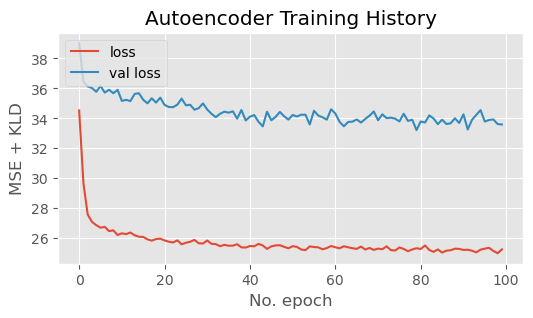

5677/5677 [==============================] - 11s 2ms/step
############################### Parameters tested: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 5ms/step - loss: 35.5935 - val_loss: 29.3998
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 30.6367 - val_loss: 26.6156
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.8031 - val_loss: 25.8177
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.3242 - val_loss: 25.5742
Epoch 5/100
284/284 [==============================] - 1s 4ms/step - loss: 28.1031 - val_loss: 

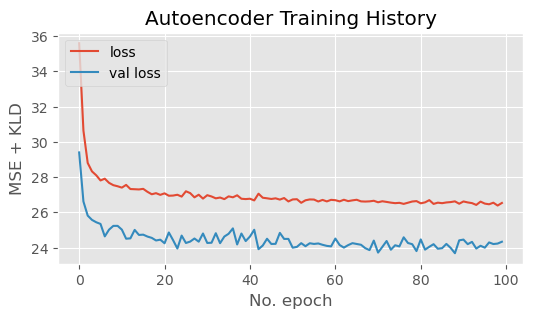

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 34.8895 - val_loss: 28.5385
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.1084 - val_loss: 25.6136
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6296 - val_loss: 24.8146
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4802 - val_loss: 25.2522
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0867 - val_loss: 24.6816
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0858 - val_loss: 24.8720
Epoch 7/100
283/283

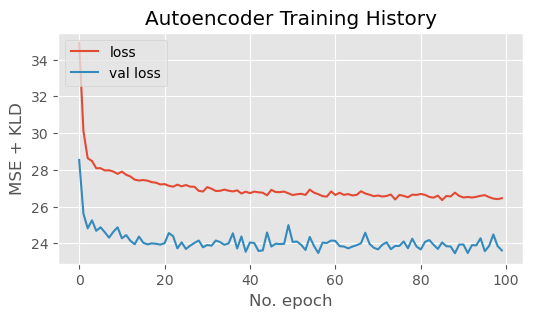

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.9504 - val_loss: 28.1171
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.1801 - val_loss: 25.1148
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.5182 - val_loss: 24.8175
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2968 - val_loss: 24.4724
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2795 - val_loss: 24.4003
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0451 - val_loss: 24.0832
Epoch 7/100
283/283

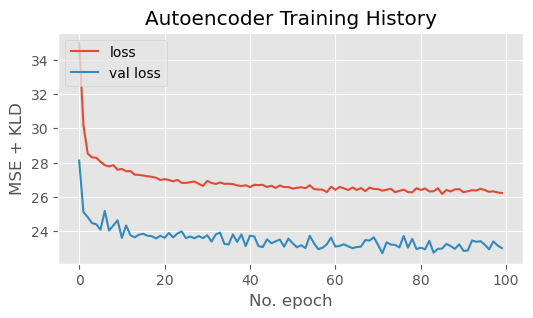

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 5ms/step - loss: 34.7001 - val_loss: 29.6466
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.7371 - val_loss: 26.6469
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4892 - val_loss: 25.9786
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.4157 - val_loss: 26.0611
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9427 - val_loss: 26.1078
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9872 - val_loss: 25.8461
Epoch 7/100
283/283

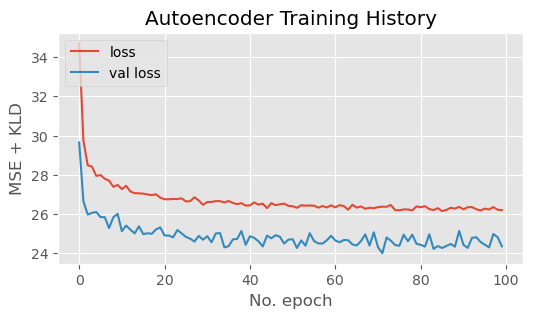

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 34.2425 - val_loss: 38.9865
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 28.8238 - val_loss: 37.1815
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.4755 - val_loss: 36.2659
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 27.2746 - val_loss: 35.9384
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.7760 - val_loss: 35.7970
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.7589 - val_loss: 36.2964
Epoch 7/100
283/283

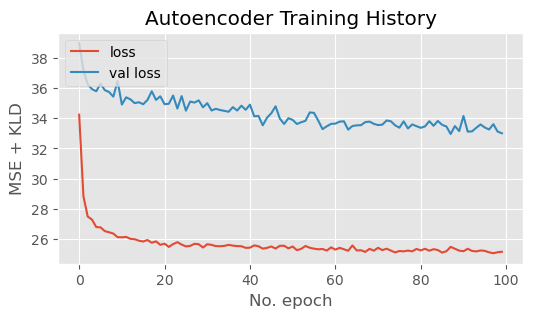

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 5ms/step - loss: 34.9302 - val_loss: 30.2252
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 30.5496 - val_loss: 26.3612
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.7838 - val_loss: 25.6889
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.4671 - val_loss: 25.8317
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 28.0612 - val_l

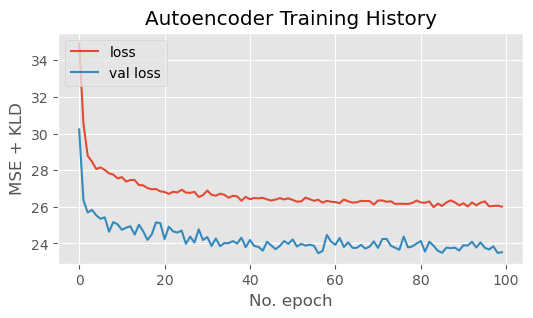

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 35.4098 - val_loss: 29.5080
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.9079 - val_loss: 26.0044
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.7766 - val_loss: 25.2495
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1777 - val_loss: 24.8211
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0098 - val_loss: 24.7836
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.8985 - val_loss: 24.9097
Epoch 7/100
283/283

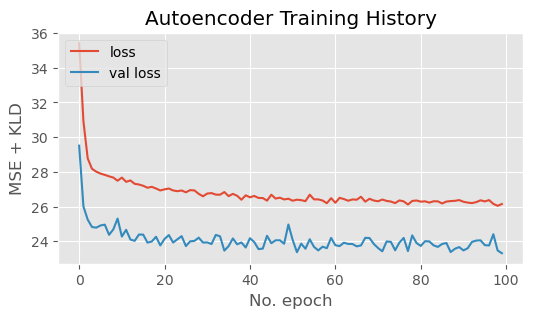

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.6095 - val_loss: 29.7151
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 31.2436 - val_loss: 26.4123
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 29.3342 - val_loss: 24.7994
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6659 - val_loss: 24.4533
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0894 - val_loss: 24.5244
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1721 - val_loss: 24.0973
Epoch 7/100
283/283

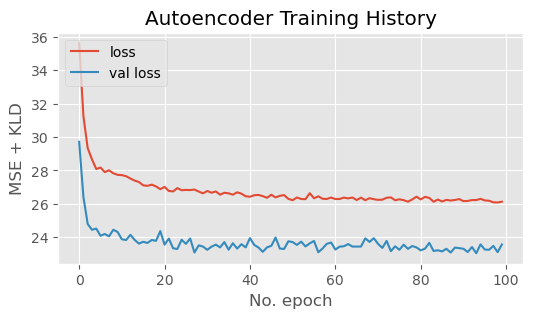

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 4s 5ms/step - loss: 35.3755 - val_loss: 29.4680
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.0235 - val_loss: 26.7122
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.4051 - val_loss: 26.1856
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0699 - val_loss: 25.6933
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9422 - val_loss: 25.7235
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.6279 - val_loss: 25.4498
Epoch 7/100
283/283

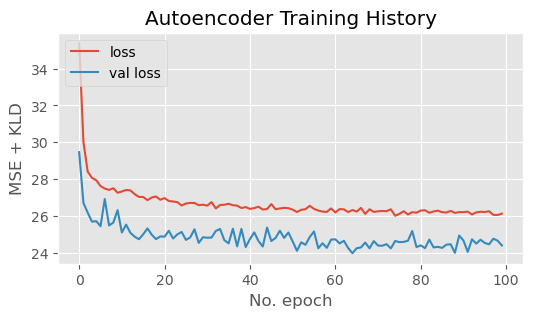

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.4644 - val_loss: 39.2762
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.1044 - val_loss: 36.9982
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.6009 - val_loss: 36.4160
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 27.2928 - val_loss: 35.9583
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.8657 - val_loss: 36.2845
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.9716 - val_loss: 35.9273
Epoch 7/100
283/283

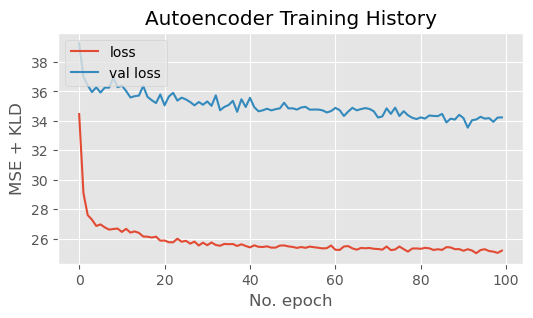

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 6ms/step - loss: 35.0962 - val_loss: 28.9296
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 29.8212 - val_loss: 26.0745
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.4629 - val_loss: 25.8989
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.1357 - val_loss: 25.3757
Epoch 5/100
284/284 [==============================] - 1s 4ms/step - loss: 27.8808 - val_loss: 

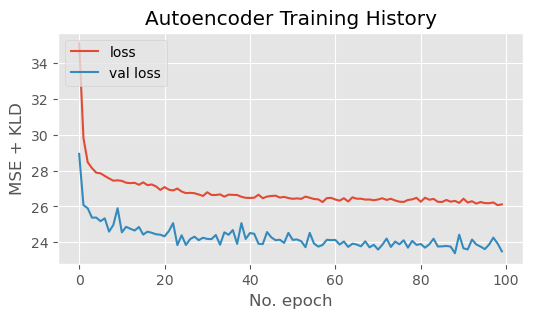

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 5ms/step - loss: 35.2271 - val_loss: 28.4482
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.1018 - val_loss: 25.6653
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6409 - val_loss: 25.0212
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.3567 - val_loss: 24.7416
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9342 - val_loss: 24.9511
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9013 - val_loss: 24.4626
Epoch 7/100
283/283

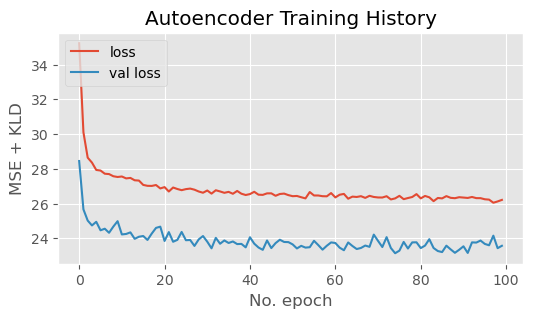

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.2653 - val_loss: 28.5548
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.2173 - val_loss: 25.6183
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7835 - val_loss: 25.1496
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7278 - val_loss: 24.7445
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2094 - val_loss: 24.3913
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2314 - val_loss: 24.2592
Epoch 7/100
283/283

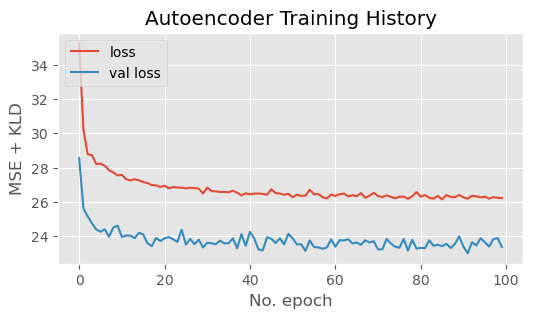

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.5397 - val_loss: 30.4777
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.2952 - val_loss: 26.9262
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7508 - val_loss: 26.1271
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4750 - val_loss: 26.1637
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8804 - val_loss: 25.5296
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8267 - val_loss: 25.7605
Epoch 7/100
283/283

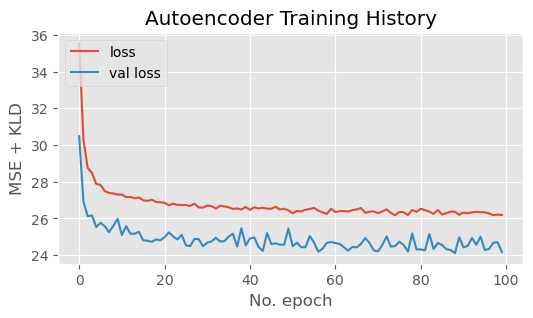

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.2408 - val_loss: 38.9784
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 28.9632 - val_loss: 36.2829
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.3910 - val_loss: 35.8692
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 26.7967 - val_loss: 35.9845
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.8189 - val_loss: 35.8174
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.4380 - val_loss: 36.6182
Epoch 7/100
283/283

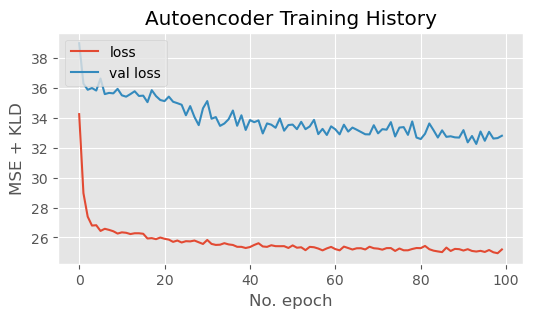

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 5ms/step - loss: 36.0285 - val_loss: 30.5621
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 30.7495 - val_loss: 26.4712
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.7555 - val_loss: 25.8924
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.2820 - val_loss: 25.5222
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 27.8411 - val_lo

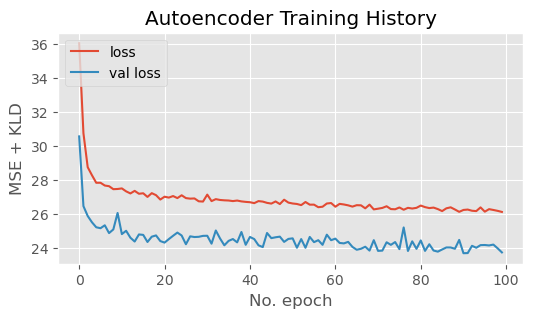

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 35.3031 - val_loss: 29.2091
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.8648 - val_loss: 25.8649
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.7699 - val_loss: 25.3074
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.3338 - val_loss: 24.9212
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1763 - val_loss: 24.6451
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.8890 - val_loss: 24.8207
Epoch 7/100
283/283

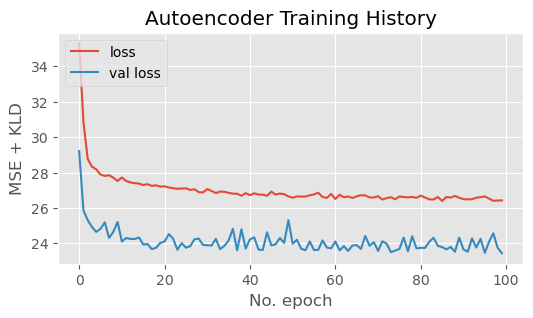

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.7713 - val_loss: 26.9617
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.8869 - val_loss: 25.1197
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6094 - val_loss: 24.7097
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1436 - val_loss: 24.2214
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1710 - val_loss: 24.3821
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.8391 - val_loss: 23.7310
Epoch 7/100
283/283

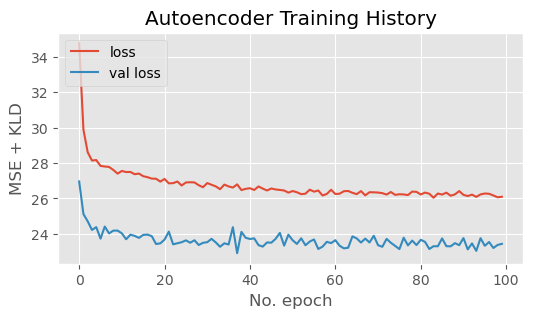

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.0146 - val_loss: 29.2482
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.0341 - val_loss: 26.7726
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.6873 - val_loss: 26.2913
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1029 - val_loss: 26.1669
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0435 - val_loss: 26.2812
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.7206 - val_loss: 25.8812
Epoch 7/100
283/283

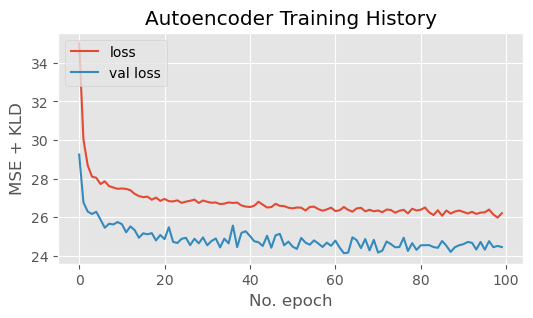

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 5ms/step - loss: 34.2935 - val_loss: 39.1048
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.2397 - val_loss: 36.3780
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 27.4225 - val_loss: 35.7742
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 26.8276 - val_loss: 36.2088
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 26.7600 - val_loss: 35.5118
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 26.4678 - val_loss: 36.6823
Epoch 7/100
283/283

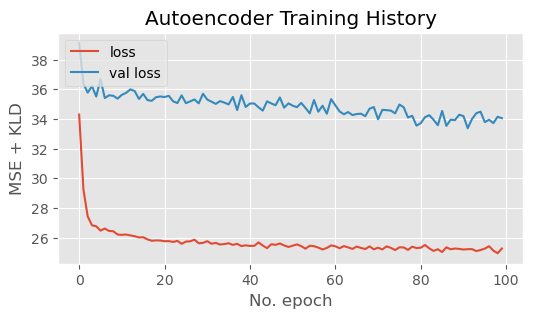

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 10, 'penalty': 'l1', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 4ms/step - loss: 34.9167 - val_loss: 29.3088
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 29.8523 - val_loss: 25.8595
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 28.5058 - val_loss: 25.4449
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.1486 - val_loss: 25.0296
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 27.8498 - val_loss: 2

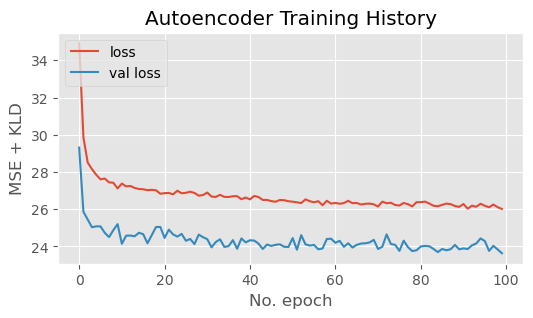

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.1967 - val_loss: 28.5172
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.2434 - val_loss: 25.6805
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7516 - val_loss: 25.0702
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2312 - val_loss: 24.7306
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4666 - val_loss: 25.1226
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0354 - val_loss: 24.6972
Epoch 7/100
283/283

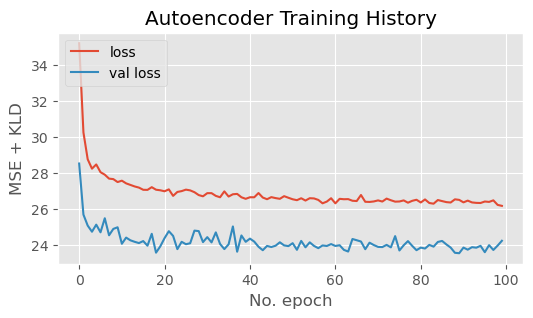

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.2932 - val_loss: 28.5366
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.9299 - val_loss: 26.5193
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 29.3616 - val_loss: 24.9218
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.6245 - val_loss: 24.3462
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1922 - val_loss: 24.9376
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.3990 - val_loss: 24.8057
Epoch 7/100
283/283

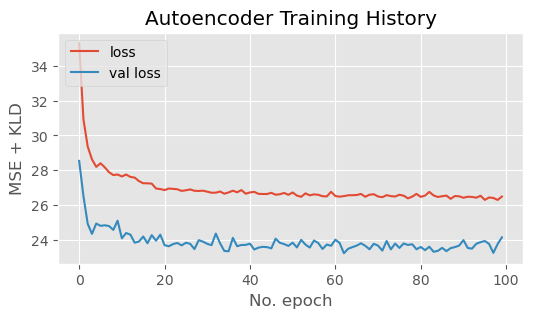

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 35.8233 - val_loss: 30.7835
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.7872 - val_loss: 27.1016
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.7346 - val_loss: 26.0185
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.5668 - val_loss: 26.2388
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.9765 - val_loss: 25.6983
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.0614 - val_loss: 25.8615
Epoch 7/100
283/283

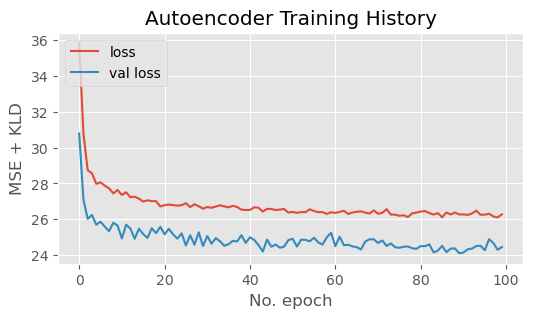

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.0127 - val_loss: 38.4366
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7907 - val_loss: 35.8470
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.6255 - val_loss: 35.7394
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 27.0868 - val_loss: 36.2857
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.9844 - val_loss: 35.7070
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.6750 - val_loss: 36.0854
Epoch 7/100
283/283

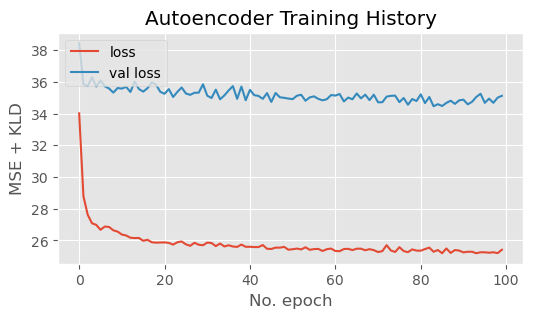

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 4ms/step - loss: 35.3386 - val_loss: 29.9169
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 30.1557 - val_loss: 26.0184
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 28.7689 - val_loss: 25.6941
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.3985 - val_loss: 25.8129
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 28.0652 - val_lo

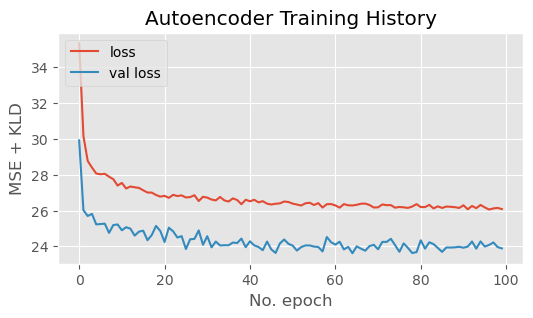

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 35.2463 - val_loss: 28.3826
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.2036 - val_loss: 25.5065
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.7649 - val_loss: 25.0186
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1459 - val_loss: 24.6568
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.2816 - val_loss: 24.9431
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9155 - val_loss: 24.5000
Epoch 7/100
283/283

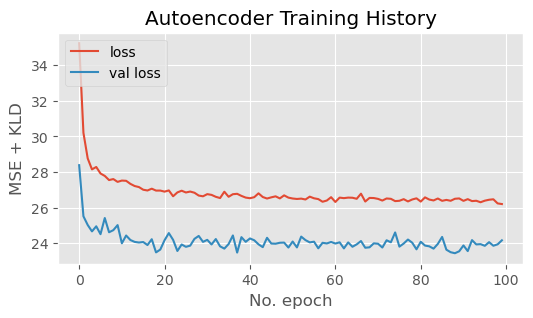

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 34.3591 - val_loss: 27.6949
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.8164 - val_loss: 25.2226
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.6677 - val_loss: 24.6245
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.8570 - val_loss: 24.6750
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.2673 - val_loss: 24.5045
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 28.3145 - val_loss: 24.4080
Epoch 7/100
283/283

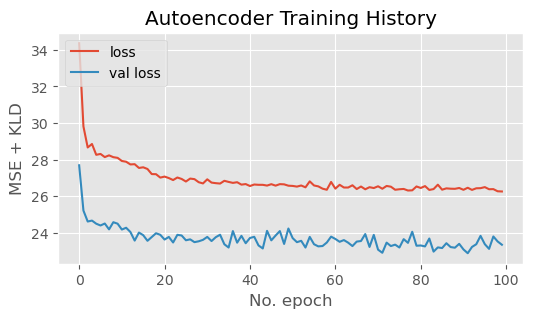

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.6594 - val_loss: 30.8651
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 30.7885 - val_loss: 27.2542
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.8472 - val_loss: 25.8735
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2165 - val_loss: 25.7070
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 27.7178 - val_loss: 25.7737
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.7502 - val_loss: 25.4439
Epoch 7/100
283/283

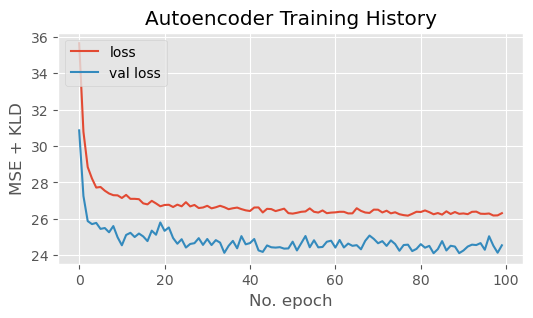

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 34.0195 - val_loss: 38.5967
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 28.7634 - val_loss: 37.0597
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 27.3989 - val_loss: 36.0133
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 26.8986 - val_loss: 35.7340
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.7391 - val_loss: 36.3254
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.7598 - val_loss: 36.0722
Epoch 7/100
283/283

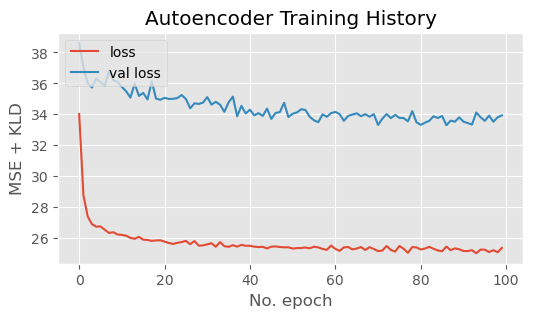

5677/5677 [==============================] - 10s 2ms/step
############################### Parameters tested: {'C': 10, 'penalty': 'l2', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 3s 5ms/step - loss: 35.2810 - val_loss: 28.7691
Epoch 2/100
284/284 [==============================] - 1s 4ms/step - loss: 30.2505 - val_loss: 26.2708
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 28.7265 - val_loss: 25.7020
Epoch 4/100
284/284 [==============================] - 1s 4ms/step - loss: 28.2605 - val_loss: 25.4929
Epoch 5/100
284/284 [==============================] - 1s 4ms/step - loss: 28.0647 - val_loss: 2

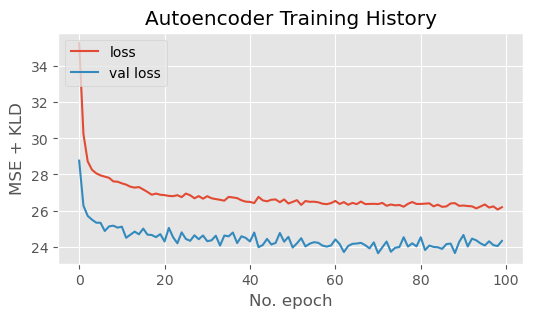

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 6ms/step - loss: 34.8118 - val_loss: 28.3908
Epoch 2/100
283/283 [==============================] - 1s 5ms/step - loss: 29.7743 - val_loss: 25.2842
Epoch 3/100
283/283 [==============================] - 1s 5ms/step - loss: 28.5058 - val_loss: 24.8467
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.2964 - val_loss: 25.0455
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.8323 - val_loss: 24.5984
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.7595 - val_loss: 25.1975
Epoch 7/100
283/283

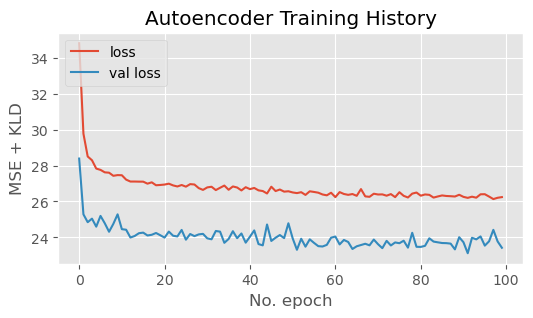

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 34.3200 - val_loss: 27.5126
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 29.8946 - val_loss: 25.0794
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 28.5374 - val_loss: 25.0178
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.5149 - val_loss: 24.5303
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1240 - val_loss: 24.2066
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 28.1334 - val_loss: 24.2275
Epoch 7/100
283/283

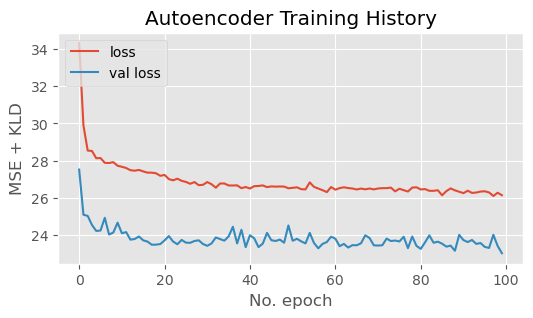

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 4ms/step - loss: 36.2004 - val_loss: 31.5428
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 31.5919 - val_loss: 28.6164
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 29.4834 - val_loss: 26.9582
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 28.4560 - val_loss: 26.2877
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 28.2330 - val_loss: 26.2189
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 27.7518 - val_loss: 25.4944
Epoch 7/100
283/283

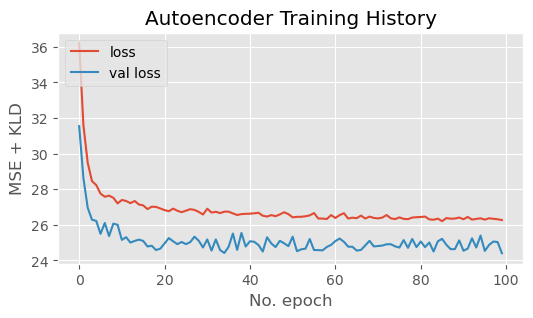

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 5ms/step - loss: 34.2481 - val_loss: 38.7590
Epoch 2/100
283/283 [==============================] - 1s 3ms/step - loss: 28.7028 - val_loss: 36.1842
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 27.4214 - val_loss: 36.2963
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 26.8743 - val_loss: 35.9180
Epoch 5/100
283/283 [==============================] - 1s 3ms/step - loss: 26.7061 - val_loss: 36.0529
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 26.5816 - val_loss: 36.0535
Epoch 7/100
283/283

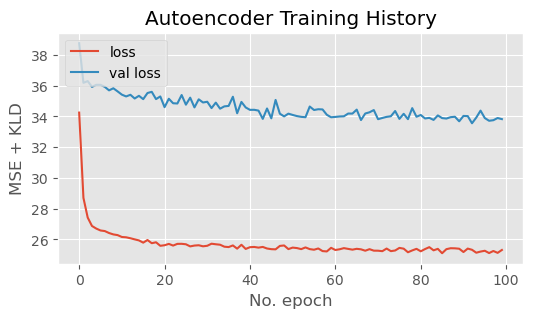

5677/5677 [==============================] - 9s 2ms/step
Accuracy:, 0.999311 (+/- 0.000045)
Precision: 0.847635 (+/- 0.012085)
Recall: 0.733398 (+/- 0.026505)
F1 score: 0.786124 (+/- 0.016984)
ROC_AUC: 0.866585 (+/- 0.013250)
Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [67]:
#With hyperparameter tuning
#Cross validation
skf = StratifiedKFold(n_splits=5)

# Define the hyperparameters to tune
param_grid = {
     'C': [0.01, 0.1, 10], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize variables to store the best hyperparameters and AUC score
best_params = {}
best_scores = []
best_f1 = -np.inf

# Iterate over all combinations of hyperparameters
for params in ParameterGrid(param_grid):
    lst_accuracy = []
    lst_precision = []
    lst_recall = []
    lst_f1_score = []
    lst_roc_auc_score = []
    
    f1_scores = []

    #estimator = RandomForestClassifier(n_estimators=50)
    model = LogisticRegression(C=params['C'], penalty=params['penalty'], solver=params['solver'])

    print("############################### Parameters tested:", params,"################################")
    for count, (train_index, valid_index) in enumerate(skf.split(X_train, y_train)):
        print("------------------------ KFold:", count+1, "---------------------------")
        X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        print(f"The training dataset has {sorted(Counter(y_train_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_train_fold).items())[1][1]} records for the minority class.")
        print(f"The test dataset has {sorted(Counter(y_valid_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_valid_fold).items())[1][1]} records for the minority class.")
        
        maj = len(y_train_fold[y_train_fold == 0])
        mino = len(y_train_fold[y_train_fold == 1])
        frac = 0.5
        num_samples = round(1/(1/frac - 1) * maj - mino)

        print("Number of samples to be generated: ", num_samples)

        # Variational Oversampling 
        vos = VAE_oversampling(hidden_dim= 64,
                                latent_dim=2,
                                original_dim=30,
                                minority_class_id=1,
                                epochs=100,
                                batch_size=1,
                                num_samples_to_generate = num_samples,
                                random_state = 0,
                                optimizer="adam")


        #Fit the VAE oversampling model and get new data set
        X_res_val,y_res_val = vos.fit_sample(X_train_fold,y_train_fold)

        std = StandardScaler()
    
        X_train_processed = std.fit_transform(X_res_val) 
        X_valid_processed = std.transform(X_valid_fold)

        model.fit(X_train_processed, y_res_val)

        y_pred_test = model.predict(X_valid_processed)

        lst_accuracy.append(accuracy_score(y_valid_fold, y_pred_test))
        lst_precision.append(precision_score(y_valid_fold, y_pred_test))
        lst_recall.append(recall_score(y_valid_fold, y_pred_test))
        lst_f1_score.append(f1_score(y_valid_fold, y_pred_test))
        lst_roc_auc_score.append(roc_auc_score(y_valid_fold, y_pred_test))


    avg_f1 = np.mean(lst_f1_score)

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_scores = [lst_accuracy, lst_precision, lst_recall, lst_f1_score, lst_roc_auc_score]
        best_params = params

# Print the best AUC score and hyperparameters
print(f"Accuracy:, {np.mean(best_scores[0]):0.6f} (+/- {np.std(best_scores[0]):0.6f})")
print(f"Precision: {np.mean(best_scores[1]):0.6f} (+/- {np.std(best_scores[1]):0.6f})")
print(f"Recall: {np.mean(best_scores[2]):0.6f} (+/- {np.std(best_scores[2]):0.6f})")
print(f"F1 score: {np.mean(best_scores[3]):0.6f} (+/- {np.std(best_scores[3]):0.6f})")
print(f"ROC_AUC: {np.mean(best_scores[4]):0.6f} (+/- {np.std(best_scores[4]):0.6f})")
print("Best hyperparameters:", best_params)


In [40]:
print(f"Accuracy:, {np.mean(best_scores[0]):0.6f} (+/- {np.std(best_scores[0]):0.6f})")
print(f"Precision: {np.mean(best_scores[1]):0.6f} (+/- {np.std(best_scores[1]):0.6f})")
print(f"Recall: {np.mean(best_scores[2]):0.6f} (+/- {np.std(best_scores[2]):0.6f})")
print(f"F1 score: {np.mean(best_scores[3]):0.6f} (+/- {np.std(best_scores[3]):0.6f})")
print(f"ROC_AUC: {np.mean(best_scores[4]):0.6f} (+/- {np.std(best_scores[4]):0.6f})")
print("Best hyperparameters:", best_params)

Accuracy:, 0.999381 (+/- 0.000064)
Precision: 0.864615 (+/- 0.011990)
Recall: 0.761246 (+/- 0.040059)
F1 score: 0.809093 (+/- 0.024669)
ROC_AUC: 0.880520 (+/- 0.020026)
Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


##### LR Cross validation

------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
NUmber of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 4s 8ms/step - loss: 35.1794 - val_loss: 29.9014
Epoch 2/100
284/284 [==============================] - 2s 5ms/step - loss: 29.9847 - val_loss: 26.0387
Epoch 3/100
284/284 [==============================] - 2s 5ms/step - loss: 28.5184 - val_loss: 25.5911
Epoch 4/100
284/284 [==============================] - 1s 5ms/step - loss: 28.3093 - val_loss: 25.6729
Epoch 5/100
284/284 [==============================] - 2s 5ms/step - loss: 28.0314 - val_loss: 25.5915
Epoch 6/100
284/284 [==============================] - 1s 5ms/step - loss: 27.8190 - val_loss: 25.2167
Epoch 7/100
284/284 [==============================] - 2s 6ms/step - loss: 27

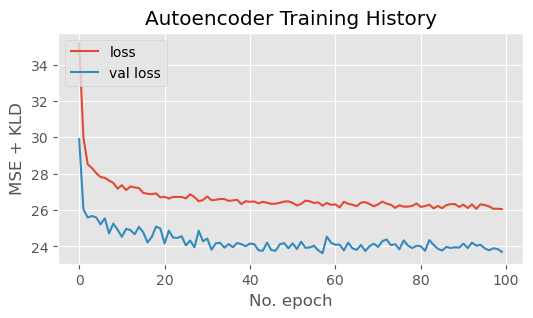

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 34.8834 - val_loss: 28.7611
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.5523 - val_loss: 25.7691
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.8248 - val_loss: 24.9859
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.4759 - val_loss: 24.6985
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9646 - val_loss: 24.7080
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.9910 - val_loss: 24.3737
Epoch 7/100
283/283

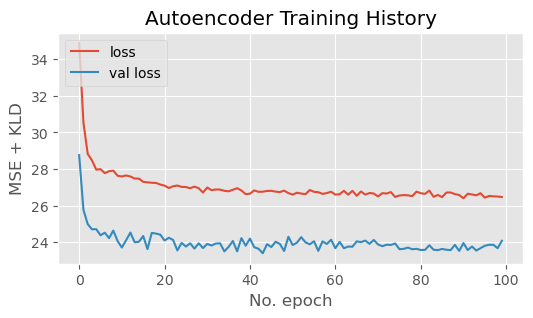

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 35.2834 - val_loss: 28.5419
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 30.4888 - val_loss: 25.2955
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.5580 - val_loss: 24.7404
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.3773 - val_loss: 24.4345
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.2098 - val_loss: 24.1911
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0267 - val_loss: 24.1600
Epoch 7/100
283/283

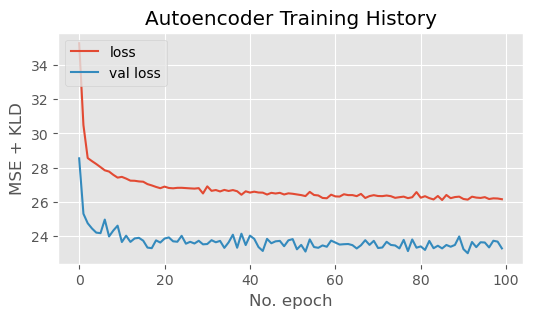

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 6ms/step - loss: 35.3341 - val_loss: 29.0155
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.9060 - val_loss: 26.6634
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.5471 - val_loss: 26.3409
Epoch 4/100
283/283 [==============================] - 1s 5ms/step - loss: 28.1980 - val_loss: 25.8920
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1032 - val_loss: 25.9279
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.7648 - val_loss: 25.5799
Epoch 7/100
283/283

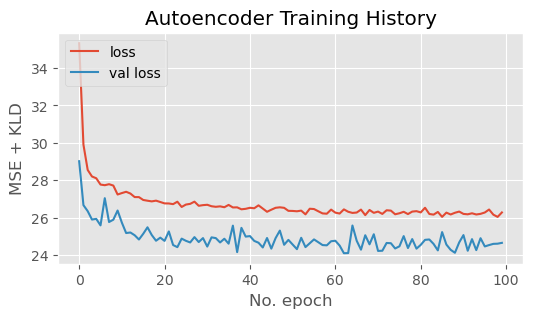

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 8ms/step - loss: 33.8849 - val_loss: 38.4271
Epoch 2/100
283/283 [==============================] - 2s 6ms/step - loss: 28.6253 - val_loss: 37.1803
Epoch 3/100
283/283 [==============================] - 2s 5ms/step - loss: 27.4597 - val_loss: 36.1254
Epoch 4/100
283/283 [==============================] - 2s 5ms/step - loss: 27.0349 - val_loss: 35.9282
Epoch 5/100
283/283 [==============================] - 1s 5ms/step - loss: 26.6845 - val_loss: 36.0754
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 26.6525 - val_loss: 35.8038
Epoch 7/100
283/283

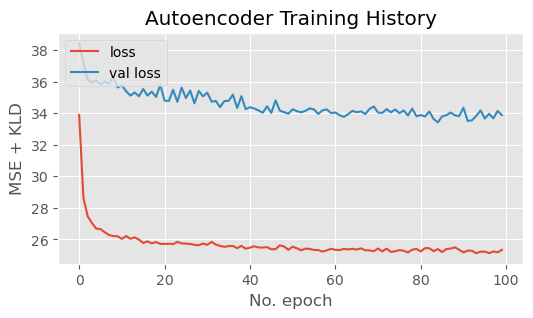

5677/5677 [==============================] - 11s 2ms/step


In [44]:
#Cross validation
skf = StratifiedKFold(n_splits=5)
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1_score = []
lst_roc_auc_score = []

#estimator = RandomForestClassifier(n_estimators=50)
model = LogisticRegression()

for count, (train_index, valid_index) in enumerate(skf.split(X_train, y_train)):
    print("------------------------ KFold:", count+1, "---------------------------")
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

    print(f"The training dataset has {sorted(Counter(y_train_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_train_fold).items())[1][1]} records for the minority class.")
    print(f"The test dataset has {sorted(Counter(y_valid_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_valid_fold).items())[1][1]} records for the minority class.")
    
    maj = len(y_train_fold[y_train_fold == 0])
    mino = len(y_train_fold[y_train_fold == 1])
    frac = 0.5
    num_samples = round(1/(1/frac - 1) * maj - mino)

    print("NUmber of samples to be generated: ", num_samples)

    # Variational Oversampling 
    vos = VAE_oversampling(hidden_dim= 64,
                            latent_dim=2,
                            original_dim=30,
                            minority_class_id=1,
                            epochs=100,
                            batch_size=1,
                            num_samples_to_generate = num_samples,
                            random_state = 0,
                            optimizer="adam")
    
    #Fit the VAE oversampling model and get new data set
    X_res_val,y_res_val = vos.fit_sample(X_train_fold,y_train_fold)
    
    std = StandardScaler()
    
    X_train_processed = std.fit_transform(X_res_val) 
    X_valid_processed = std.transform(X_valid_fold)

    model.fit(X_train_processed, y_res_val)

    y_pred_test = model.predict(X_valid_processed)

    lst_accuracy.append(accuracy_score(y_valid_fold, y_pred_test))
    lst_precision.append(precision_score(y_valid_fold, y_pred_test))
    lst_recall.append(recall_score(y_valid_fold, y_pred_test))
    lst_f1_score.append(f1_score(y_valid_fold, y_pred_test))
    lst_roc_auc_score.append(roc_auc_score(y_valid_fold, y_pred_test))


In [45]:
print(f"Accuracy:, {np.mean(lst_accuracy):0.6f} (+/- {np.std(lst_accuracy):0.6f})")
print(f"Precision: {np.mean(lst_precision):0.6f} (+/- {np.std(lst_precision):0.6f})")
print(f"Recall: {np.mean(lst_recall):0.6f} (+/- {np.std(lst_recall):0.6f})")
print(f"F1 score: {np.mean(lst_f1_score):0.6f} (+/- {np.std(lst_f1_score):0.6f})")
print(f"ROC_AUC: {np.mean(lst_roc_auc_score):0.6f} (+/- {np.std(lst_roc_auc_score):0.6f})")

Accuracy:, 0.999280 (+/- 0.000029)
Precision: 0.855332 (+/- 0.008243)
Recall: 0.702921 (+/- 0.029841)
F1 score: 0.771179 (+/- 0.015431)
ROC_AUC: 0.851357 (+/- 0.014910)


##### LR One Fit

Epoch 1/100
354/354 [==============================] - 6s 13ms/step - loss: 34.6033 - val_loss: 25.9905
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 29.6325 - val_loss: 24.3187
Epoch 3/100
354/354 [==============================] - 2s 6ms/step - loss: 28.4825 - val_loss: 23.7741
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 28.0958 - val_loss: 23.6386
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 28.0318 - val_loss: 23.5838
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 27.8937 - val_loss: 23.3982
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 27.8149 - val_loss: 23.2489
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 27.6091 - val_loss: 23.3994
Epoch 9/100
354/354 [==============================] - 2s 4ms/step - loss: 27.6666 - val_loss: 23.2086
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - lo

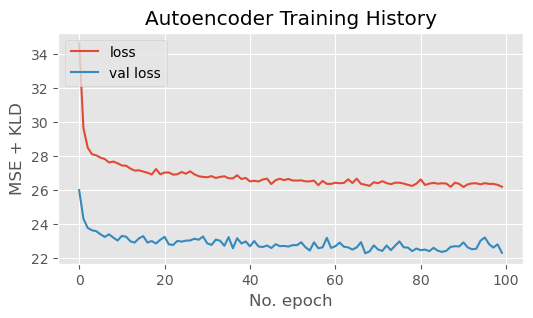

7096/7096 [==============================] - 15s 2ms/step


In [41]:
maj = len(y_train[y_train == 0])
mino = len(y_train[y_train == 1])
frac = 0.5
num_samples = round(1/(1/frac - 1) * maj - mino)

# Variational Oversampling 
vos = VAE_oversampling(hidden_dim= 64,
                        latent_dim=2,
                        original_dim=30,
                        minority_class_id=1,
                        epochs=100,
                        batch_size=1,
                        num_samples_to_generate = num_samples,
                        random_state = 0,
                        optimizer="adam")

#Fit the VAE oversampling model and get new data set
X_res_val,y_res_val = vos.fit_sample(X_train, y_train)

std = StandardScaler()

X_train_processed = std.fit_transform(X_res_val) 
X_test_processed = std.transform(X_test)

In [42]:
pd.DataFrame(X_res_val)

0         1         2         3         4         5   \
0       161919.000000  1.946747 -0.752526 -1.355130 -0.661630  1.502822   
1       124477.000000  2.035149 -0.048880 -3.058693  0.247945  2.943487   
2        41191.000000 -0.991920  0.603193  0.711976 -0.992425 -0.825838   
3       132624.000000  2.285718 -1.500239 -0.747565 -1.668119 -1.394143   
4        59359.000000 -0.448747 -1.011440  0.115903 -3.454854  0.715771   
...               ...       ...       ...       ...       ...       ...   
454897   82832.179688 -4.173392  3.668420 -6.578082  4.687133 -2.886705   
454898  100672.437500 -0.155211  3.588729 -0.725867  4.592975  1.438116   
454899  130757.750000  0.102923  3.588729 -1.890665  4.592975  2.088203   
454900   83348.742188 -4.154328  3.604995 -6.710429  4.642052 -2.645648   
454901   82832.195312 -4.706942  7.650697 -7.068217  7.321691 -3.101438   

              6         7         8         9   ...        20        21  \
0       4.024933 -1.479661  1.139880  1.406819  ... -0.134435  0.076197   
1       3.298697 -0.002192  0.674782  0.045826  ... -0.227279  0.038628   
2       1.956261 -2.212603 -5.037523  0.000772  ...  1.280856 -2.798352   
3      -0.350339 -1.427984  0.010010 -1.118447  ... -0.490642 -0.139670   
4      -0.147490  0.504347 -0.113817 -0.044782  ... -0.275297 -0.243245   
...          ...       ...       ...       ...  ...       ...       ...   
454897 -1.318493 -5.278883  0.618234 -2.515834  ...  0.367891  0.807397   
454898 -0.438940 -0.624459  0.587929 -0.172388  ...  0.358018  0.628814   
454899 -1.384610 -1.036765  0.587926 -0.339840  ...  0.358018  0.628814   
454900 -1.387187 -5.203990  1.447973 -2.584458  ...  0.358318  0.721408   
454901 -1.387192 -5.539876  6.883837 -2.589654  ...  0.358042  2.399400   

              22        23        24        25        26        27        28  \
0       0.297537  0.307915  0.690980 -0.350316 -0.388907  0.077641 -0.032248   
1       0.228197  0.035542  0.707090  0.512885 -0.471198  0.002520 -0.069002   
2       0.109526 -0.436530 -0.932803  0.826684  0.913773  0.038049  0.185340   
3       0.077013  0.208310 -0.538236 -0.278032 -0.162068  0.018045 -0.063005   
4      -0.173298 -0.006692 -1.362383 -0.292234 -0.144622 -0.032580 -0.064194   
...          ...       ...       ...       ...       ...       ...       ...   
454897  0.057349 -0.051940 -0.109108  0.019901  0.245528  1.112971  0.079294   
454898  0.051318 -0.062790 -0.109108  0.039748  0.047834  0.156829  0.078113   
454899  0.051318 -0.062790 -0.109108  0.019994  0.047851  0.155962  0.099951   
454900  0.051396 -0.062786 -0.099142  0.020916  0.132864  0.329254  0.353601   
454901  0.051326 -0.062789  0.397487  0.123963  0.050312  0.160008  0.127882   

                29  
0         7.320000  
1         2.990000  
2       175.100000  
3         6.100000  
4        86.100000  
...            ...  
454897  135.423935  
454898  125.768768  
454899  125.591469  
454900  125.591476  
454901  125.591469  

[454902 rows x 30 columns]

In [43]:
logReg_vae = LogisticRegression()

logReg_vae.fit(X_train_processed, y_res_val)

#predict
pred_lr_vae_val = logReg_vae.predict(X_test_processed)

model_scores(y_test, pred_lr_vae_val)

Accuracy: 0.9991573329588147
Precision: 0.7450980392156863
Recall: 0.7755102040816326
F1 score: 0.76
ROC_AUC: 0.8875264863964719


In [683]:
def autoencoder_estimator_data_split(X_train, y_train):
    # Prepare data for autoencoder - only need samples from fraud tranasactions as the autoencoder will learn from those
    X_train_1 = X_train[y_train == 1]

    #Get a sample of the fraud to use for autoencoder training
    X_train_AE = X_train_1.sample(frac=0.5)
    autoencoder_scaler = StandardScaler()
    X_train_AE_scaled = autoencoder_scaler.fit_transform(X_train_AE) 
    print("X_train_AE_scaled:", X_train_AE_scaled.shape)
    
    #Let the rest of the datat in train to be used to train the modelS
    X_train_est = X_train.drop(X_train_AE.index)
    y_train_est = y_train.drop(X_train_AE.index)

    return X_train_AE_scaled, X_train_est, y_train_est, autoencoder_scaler

In [684]:
#Usig these parameters to sample new similar points from latent space
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], 2))
    return z_mean + K.exp(0.5*z_log_sigma) * epsilon

In [707]:
def create_vae(original_dim, intermediate_dim, latent_dim):
    # Mapping inputs to latent distribution parameters
    inputs = Input(shape=(original_dim,))
    h = Dense(intermediate_dim, activation='relu')(inputs)
    #h = Dense(32, activation='relu')(h)  # Added second hidden layer

    #Latent space layer
    z_mean = Dense(latent_dim)(h)
    z_log_sigma = Dense(latent_dim)(h)

    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

    #Mapping these sampled latent points back to reconstructed inputs
    # Create encoder
    encoder = Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

    # Create decoder
    latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
    #x = Dense(32, activation='relu')(latent_inputs)
    x = Dense(intermediate_dim, activation='relu')(latent_inputs) # Added second hidden layer
    outputs = Dense(original_dim, activation='sigmoid')(x)
    decoder = Model(latent_inputs, outputs, name='decoder')

    # instantiate VAE model
    outputs = decoder(encoder(inputs)[2])
    vae = Model(inputs, outputs, name='vae_mlp')

    #Caclulate reconstruction from input and output
    reconstruction_loss = mse(inputs, outputs)
    reconstruction_loss *= original_dim
        
    #Kullback-liebler divergence loss
    kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    
    #The total vae loss
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)

    return vae

In [708]:
def generate_fraudulent_data(decoder, num_samples, latent_dim):
    # Sample latent vectors from a normal distribution or use random sampling method
    latent_samples = np.random.normal(0, 1, size=(num_samples, latent_dim))

    # Use the decoder part of the trained VAE to generate fraudulent data
    generated_data = decoder.predict(latent_samples)

    return generated_data

In [709]:
def balance_dataset(generated_data, X_train_fold, y_train_fold, num_samples):
    print(f"The training dataset before balancing has {sorted(Counter(y_train_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_train_fold).items())[1][1]} records for the minority class.")    
    synthetic_y = np.ones(num_samples)\
            * 1

    sampled_data_fraud = pd.DataFrame(generated_data, columns=X_train_fold.columns)

    X_new = np.concatenate((X_train_fold, sampled_data_fraud))
    y_new = np.concatenate((y_train_fold, synthetic_y))

    print(f"The training dataset after balancing has {sorted(Counter(y_new).items())[0][1]} records for the majority class and {sorted(Counter(y_new).items())[1][1]} records for the minority class.")

    return (X_new, y_new)

In [701]:
from keras.optimizers import Adam

X_train_AE_scaled: (197, 30)
Epoch 1/100
3/3 [==============================] - 3s 452ms/step - loss: 39.2814 - val_loss: 33.1136
Epoch 2/100
3/3 [==============================] - 0s 43ms/step - loss: 38.8158 - val_loss: 32.8368
Epoch 3/100
3/3 [==============================] - 0s 46ms/step - loss: 38.2672 - val_loss: 32.6313
Epoch 4/100
3/3 [==============================] - 0s 41ms/step - loss: 37.3292 - val_loss: 32.1018
Epoch 5/100
3/3 [==============================] - 0s 40ms/step - loss: 37.7401 - val_loss: 32.1862
Epoch 6/100
3/3 [==============================] - 0s 41ms/step - loss: 37.9875 - val_loss: 31.7080
Epoch 7/100
3/3 [==============================] - 0s 40ms/step - loss: 37.0205 - val_loss: 31.2987
Epoch 8/100
3/3 [==============================] - 0s 41ms/step - loss: 37.1373 - val_loss: 31.4390
Epoch 9/100
3/3 [==============================] - 0s 78ms/step - loss: 36.6209 - val_loss: 30.9430
Epoch 10/100
3/3 [==============================] - 0s 41ms/step - los

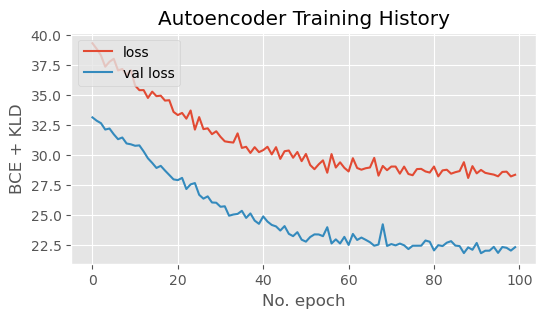

In [754]:
# Build autoencoder to sample data
original_dim = 30
intermediate_dim = 64
latent_dim = 2

vae = create_vae(original_dim, intermediate_dim, latent_dim)
vae.compile(optimizer='adam')

epochs=100
batch_size=64

X_train_AE_scaled, X_train_est, y_train_est, ae_scaler = autoencoder_estimator_data_split(X_train, y_train)

history = vae.fit(X_train_AE_scaled, X_train_AE_scaled, batch_size, epochs, validation_split=0.1)

plt.figure(figsize=(6,3))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.ylabel('BCE + KLD')
plt.xlabel('No. epoch')
plt.legend(loc="upper left") 
plt.title("Autoencoder Training History")
plt.show()

In [749]:
#Cross validation

skf = StratifiedKFold(n_splits=5)
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1_score = []
lst_roc_auc_score = []


#estimator = RandomForestClassifier(n_estimators=50)
estimator = LogisticRegression(C=0.01, penalty='l2')

for count, (train_index, valid_index) in enumerate(skf.split(X_train_est, y_train_est)):
    print("------------------------ KFold:", count+1, "---------------------------")
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

    print(f"The training dataset has {sorted(Counter(y_train_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_train_fold).items())[1][1]} records for the minority class.")
    print(f"The test dataset has {sorted(Counter(y_valid_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_valid_fold).items())[1][1]} records for the minority class.")

    num_samples = sorted(Counter(y_train_fold).items())[0][1] - sorted(Counter(y_train_fold).items())[1][1]
    print("NUmber of samples to be generated: ", num_samples)
    generated_data = generate_fraudulent_data(vae.layers[2], num_samples, latent_dim)

    inversed_generated_samples = ae_scaler.inverse_transform(generated_data)

    X_balanced_train_est, y_balanced_train_est = balance_dataset(inversed_generated_samples, X_train_fold, y_train_fold, num_samples)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_balanced_train_est[:])
    X_test_scaled = scaler.transform(X_valid_fold)

    # Model
    estimator.fit(X_balanced_train_est, y_balanced_train_est)

    y_pred_test = estimator.predict(X_test_scaled)

    lst_accuracy.append(accuracy_score(y_valid_fold, y_pred_test))
    lst_precision.append(precision_score(y_valid_fold, y_pred_test))
    lst_recall.append(recall_score(y_valid_fold, y_pred_test))
    lst_f1_score.append(f1_score(y_valid_fold, y_pred_test))
    lst_roc_auc_score.append(roc_auc_score(y_valid_fold, y_pred_test))


------------------------ KFold: 1 ---------------------------
The training dataset has 181809 records for the majority class and 309 records for the minority class.
The test dataset has 45446 records for the majority class and 84 records for the minority class.
NUmber of samples to be generated:  181500
5672/5672 [==============================] - 10s 2ms/step
The training dataset before balancing has 181809 records for the majority class and 309 records for the minority class.
The training dataset after balancing has 181809 records for the majority class and 181809 records for the minority class.
------------------------ KFold: 2 ---------------------------
The training dataset has 181786 records for the majority class and 332 records for the minority class.
The test dataset has 45469 records for the majority class and 61 records for the minority class.
NUmber of samples to be generated:  181454
5671/5671 [==============================] - 9s 2ms/step
The training dataset before balan

## GAN

In [8]:
maj = len(y_train[y_train == 0])
mino = len(y_train[y_train == 1])
frac = 0.5
num_samples = round(1/(1/frac - 1) * maj - mino)

gan = GAN(input_dim= 30, generator_output_dim=30, num_samples=num_samples, epochs=100, batch_size=24)

#Fit the GAN oversampling model and get new data set
X_res_val_gan,y_res_val_gan = gan.fit_sample(X_train, y_train)

std = StandardScaler()

X_train_processed_gan = std.fit_transform(X_res_val_gan) 
X_test_processed_gan = std.transform(X_test)

1/1 [==============================] - 0s 184ms/step
1 [D loss: 0.569694, acc.: 60.42%] [G loss: 0.660127]
1/1 [==============================] - 0s 53ms/step
2 [D loss: 0.568774, acc.: 56.25%] [G loss: 0.655157]
1/1 [==============================] - 0s 45ms/step
3 [D loss: 0.563060, acc.: 58.33%] [G loss: 0.651591]
1/1 [==============================] - 0s 42ms/step
4 [D loss: 0.570556, acc.: 56.25%] [G loss: 0.664129]
1/1 [==============================] - 0s 41ms/step
5 [D loss: 0.561039, acc.: 56.25%] [G loss: 0.669460]
1/1 [==============================] - 0s 43ms/step
6 [D loss: 0.561004, acc.: 56.25%] [G loss: 0.672710]
1/1 [==============================] - 0s 39ms/step
7 [D loss: 0.563488, acc.: 58.33%] [G loss: 0.682309]
1/1 [==============================] - 0s 40ms/step
8 [D loss: 0.553137, acc.: 62.50%] [G loss: 0.675612]
1/1 [==============================] - 0s 40ms/step
9 [D loss: 0.554745, acc.: 60.42%] [G loss: 0.674331]
1/1 [==============================] - 0s 34m

In [10]:
X_res_val_gan

array([[ 1.61919000e+05,  1.94674667e+00, -7.52525821e-01, ...,
         7.76408382e-02, -3.22477642e-02,  7.32000000e+00],
       [ 1.24477000e+05,  2.03514919e+00, -4.88803143e-02, ...,
         2.51988539e-03, -6.90016836e-02,  2.99000000e+00],
       [ 4.11910000e+04, -9.91919644e-01,  6.03192643e-01, ...,
         3.80486857e-02,  1.85340320e-01,  1.75100000e+02],
       ...,
       [ 1.04855805e+05, -3.39020228e+00,  6.45963097e+00, ...,
         8.57917607e-01,  3.82762730e-01,  2.58730713e+02],
       [ 9.85837344e+04, -2.77380610e+00,  5.79260159e+00, ...,
         9.08202708e-01,  4.11534041e-01,  3.12990845e+02],
       [ 1.03935328e+05, -2.78836179e+00,  6.11513329e+00, ...,
         8.24577987e-01,  4.25708979e-01,  3.31963013e+02]])

In [17]:
logReg_vae = LogisticRegression()

logReg_vae.fit(X_train_processed_gan, y_res_val_gan)

#predict
pred_lr_vae_val = logReg_vae.predict(X_test_processed_gan)

model_scores(y_test, pred_lr_vae_val)

Accuracy: 0.9991573329588147
Precision: 0.8205128205128205
Recall: 0.6530612244897959
F1 score: 0.7272727272727272
ROC_AUC: 0.8264075115133278


In [18]:
randomForest_vae = RandomForestClassifier()

randomForest_vae.fit(X_train_processed_gan, y_res_val_gan)

#predict
pred_lr_vae_val = randomForest_vae.predict(X_test_processed_gan)

model_scores(y_test, pred_lr_vae_val)

Accuracy: 0.9996137776061234
Precision: 0.9523809523809523
Recall: 0.8163265306122449
F1 score: 0.8791208791208791
ROC_AUC: 0.9081280936685311
